In [ ]:
# !pip install apyori

In [ ]:
import pandas as pd
import json
import pprint
import dask.dataframe as dd # ‰∏≠Ë≥áÊñôÈõÜÂàÜÊï£ÈÅãÁÆóÔºàÈ°û‰ººsparkÔºâ
from apyori import apriori 
from geopy.distance import geodesic # ÁÆóË∑ùÈõ¢
import re
import networkx as nx # Áï´Èóú‰øÇÂúñ
import matplotlib.pyplot as plt
# from mlxtend.frequent_patterns import apriori, association_rules # ÈóúËÅØÂºèÂàÜÊûê

### ËÆÄÂéüÂßãË≥áÊñô
- reviewË©ïË´ñÊï∏Ôºö 6375018 ÔºåÁ¥Ñ 637.5 Ëê¨
- user‰ΩøÁî®ËÄÖÊï∏Ôºö 1764969 ÔºåÁ¥Ñ 176.5 Ëê¨
- location_idÊôØÈªûÊï∏Ôºö 838

In [2]:
##### ËÆÄÊ™î
# Âú∞ÈªûÂü∫Êú¨Ë≥áË®ä(838)
with open("../data/838-Âú∞ÈªûÂü∫Êú¨Ë≥áË®ä.json", 'r') as file:
    loc_info_json = json.load(file)                      # ËÆÄjsonÊ™î
loc_info_org = pd.json_normalize(loc_info_json)    # Â∞ájsonËΩâpd.DataFrame

# Âú∞ÈªûÊ∏ÖÂñÆ(838)
loc_list_org = pd.read_csv("../data/838-Âú∞ÈªûÊ∏ÖÂñÆ.csv", encoding="utf-8")

# ÊâÄÊúâË©ïË´ñÂéüÂßãË≥áÊñô(6,375,018)
gmap_review_org = pd.read_csv("../data/838-ÊâÄÊúâË©ïË´ñÂéüÂßãË≥áÊñô.csv", encoding="utf-8")

# ÊâÄÊúâË©ïË´ñ_Ë™ûÁ≥ª‰øÆÊ≠£_nlpÊñ∑Ë©û(6,375,018)
gmap838_nlp_org = pd.read_csv("../data/gmap838_nlp.csv", encoding="utf-8")

##### Â≠òÂõûcsv
# df.to_csv("output.csv", index=False, encoding="utf-8")

print('loc_info_org:',len(loc_info_org))
print('loc_list_org:',len(loc_list_org))
print('gmap_review_org:',len(gmap_review_org))
print('gmap838_nlp_org:',len(gmap838_nlp_org))

loc_info_org: 838
loc_list_org: 838
gmap_review_org: 6375018
gmap838_nlp_org: 6375018


/var/folders/sj/mtls40j55rn87dkczphv9vn80000gn/T/ipykernel_11611/1524319038.py:14: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  gmap838_nlp_org = pd.read_csv("../data/gmap838_nlp.csv", encoding="utf-8")


### Ë©ïË´ñÊï∏Áµ±Ë®à & ‰øùÁïôÈúÄË¶ÅÊ¨Ñ‰Ωç


In [3]:
##### Âª∫Á´ã ‰ΩøÁî®ËÄÖ_Á∏ΩË©ïË´ñÊï∏
user_total_reviews = gmap_review_org.groupby('user_id').size().reset_index(name='user_reviews_count')
user_total_reviews = user_total_reviews.sort_values(by='user_reviews_count', ascending=False) # Â§öÂà∞Â∞ë

##### Âª∫Á´ã ÂêÑÊôØÈªû_Á∏ΩË©ïË´ñÊï∏
location_total_reviews = gmap_review_org.groupby('location_id').size().reset_index(name='location_reviews_count')
location_total_reviews = location_total_reviews.sort_values(by='location_reviews_count', ascending=False)


##### ÁïôÈúÄË¶ÅË≥áË®ä
# Âú∞ÈªûÂü∫Êú¨Ë≥áË®ä(838)
loc_info = loc_info_org # Êö´ÁÑ°‰øÆÊîπ

# Âú∞ÈªûÊ∏ÖÂñÆ(838)
loc_list = loc_list_org[["gmap_location", "location_id", "gmap_coordinates", "attraction_type"]]

# ÊâÄÊúâË©ïË´ñ_Ë™ûÁ≥ª‰øÆÊ≠£_nlpÊñ∑Ë©û(6,375,018)
gmap838_nlp = gmap838_nlp_org[['review_id', 'langTag', 'snownlp_scores', 'snownlp_scores_0-100']]

# ÊâÄÊúâË©ïË´ñ(6,375,018)ÔºàË™ûÁ≥ª‰ΩøÁî®gmap838_nlpÊ™îÊ°à‰ΩúÁÇ∫‰æùÊìöÔºåÊñ∞Â¢ûÊ¨Ñ‰ΩçÔºönlpÊÉÖÁ∑íÂàÜÊï∏ / userÁ∏ΩË©ïË´ñÊï∏ / ÊôØÈªûÁ∏ΩË©ïË´ñÊï∏Ôºâ
gmap_review_org_2 = gmap_review_org[['review_id', 'gmap_location', 'location_id', 'user_name', 'user_id', 'score', 'date', 'comments', 'translated_comments']] 
gmap_review_org_3 = gmap_review_org_2.merge(gmap838_nlp,on='review_id').merge(user_total_reviews, on='user_id').merge(location_total_reviews, on='location_id')
gmap_review = gmap_review_org_3


print('loc_info:',len(loc_info))
print('loc_list:',len(loc_list))
print('gmap838_nlp:',len(gmap838_nlp))
print('gmap_review:',len(gmap_review))


loc_info: 838
loc_list: 838
gmap838_nlp: 6375018
gmap_review: 6375018


### Ââç‰∏âÂ§ßË™ûÁ≥ª‰ΩøÁî®ËÄÖ 

| **Ë™ûÁ≥ª** | **Ê≥ï‰∏Ä** | **Ê≥ï‰∫å** |
|----------|--------------|----------|
| ÁπÅ‰∏≠ | **793,373** | **786,120** |
| Ëã±Êñá | **73,958** | **66,914** |
| Êó•Êñá | **19,493** | **15,408** |
| ÈüìÊñá | **20,795** | **20,588** |

##### Ê≥ï‰∏ÄÔºö
Êö´‰∏çËôïÁêÜ‰ΩøÁî®ËÄÖÁî®‰∏çÂêåË™ûÁ≥ªÂïèÈ°åÔºåËã•ÊõæÁî®ÈÅéÔºåÂâáË™çÂÆöÁÇ∫Ë©≤Ë™ûÁ≥ª‰ΩøÁî®ËÄÖÔºåex:Ëã•Êõæ‰ΩøÁî®ÈÅéÊó•Êñá„ÄÅËã±ÊñáÔºåÊäìÂêÑË™ûÁ≥ª‰ΩøÁî®ËÄÖÊôÇÊúÉË¢´ÈáçË§áÊäìÂèñ„ÄÇ

In [4]:
##### Ê≥ï1:
# ‰∏≠Êñá‰ΩøÁî®ËÄÖid
zh_user = gmap_review[gmap_review['langTag'].isin(['zh-Hant'])]["user_id"].unique()
print(len(zh_user))

# Ëã±Êñá‰ΩøÁî®ËÄÖid
en_user = gmap_review[gmap_review['langTag'] == 'en']["user_id"].unique()
print(len(en_user))

# Êó•Êñá‰ΩøÁî®ËÄÖid
ja_user = gmap_review[gmap_review['langTag'] == 'ja']["user_id"].unique()
print(len(ja_user))

# ÈüìÊñá‰ΩøÁî®ËÄÖid
ko_user = gmap_review[gmap_review['langTag'] == 'ko']["user_id"].unique()
print(len(ko_user))



793373
73958
19493
20795


##### Ê≥ï‰∫åÔºö
Êäì‰∏ªË¶Å‰ΩøÁî®Ë™ûË®Ä„ÄÇ

In [5]:
##### Ê≥ï2: ÂÆöÁæ©ÊØè‰Ωç‰ΩøÁî®ËÄÖÂúãÁ±ç

##### ‰ΩøÁî®ËÄÖË™ûÁ≥ªÔºà911,791‰Ωç ÊõæË©ïË´ñÈÅéÔºåÂèØÂà§Êñ∑Ë™ûÁ≥ª)
# Ë®àÁÆóÊØèÂÄã‰ΩøÁî®ËÄÖÂú®ÊØèÁ®ÆË™ûË®ÄÁöÑË©ïË´ñÊï∏
user_lang_counts = gmap_review.groupby(['user_id', 'langTag']).size().reset_index(name='review_count')
# ÊâæÂá∫ÊØèÂÄã‰ΩøÁî®ËÄÖË©ïË´ñÊï∏ÊúÄÂ§öÁöÑË™ûË®Ä
idx = user_lang_counts.groupby('user_id')['review_count'].idxmax()
# ÈÅ∏ÊìáË©ïË´ñÊúÄÂ§öÁöÑË™ûË®Ä
main_language = user_lang_counts.loc[idx, ['user_id', 'langTag']].rename(columns={'langTag': 'primary_language'})

print(len(main_language))
# print(main_language.sort_values(by=['primary_language'], ascending=[False])[:3])
print(main_language.groupby("primary_language").size().reset_index(name="size").sort_values(by='size', ascending=False).head(6))
print("="*30)

##### ‰ΩøÁî®ËÄÖË™ûÁ≥ªÔºà853,178‰ΩçÔºåÊú™Ë©ïË´ñÈÅéÔºåÁÑ°Ê≥ïÂà§Êñ∑Ë™ûÁ≥ªÔºâ
# ÊâæÂá∫ gmap_review ‰∏≠ user_id ‰∏çÂú® main_language['user_id'] Ë£°ÁöÑË≥áÊñô
no_main_language = gmap_review[~gmap_review['user_id'].isin(main_language['user_id'])]["user_id"].unique()
print(len(no_main_language))
print("="*30)


##### check
# check_id = ['100137013943539884457']
# print(user_lang_counts.query("user_id in @check_id "))
# print(main_language.query("user_id in @check_id "))

911791
   primary_language    size
83          zh-Hant  786120
14               en   66914
45               ko   20588
41               ja   15408
82               zh    8244
35               id    3808
853178


### Áúã‰∏Ä‰∏ãË≥áÊñôÈï∑Áõ∏

In [ ]:
##### loc_info
# print(loc_info_org.columns)
# print(loc_info_org.info())
loc_info_org.head(3)

# ÈùûÁ©∫ÂÄº
# loc_info_org[(loc_info_org['stay_time'].notna()) & (loc_info_org['stay_time'] != '')]

In [ ]:
##### loc_list
# loc_list_org.info()
# loc_list_org.head(3)
loc_list.head(3)

# loc_list["gmap_location"].unique()
# loc_list[loc_list['gmap_location'].str.contains('È´òÈõÑ', na=False)]['gmap_location'].unique()

In [ ]:
##### gmap838_nlp
# gmap838_nlp_org.columns
# gmap838_nlp_org.head(2)
gmap838_nlp.head(2)


In [ ]:
##### gmap_review
'''
# Êü•ÁúãË≥áÊñôÁ≠ÜÊï∏
print("="*10,len(gmap_review),"="*10)
# Êü•ÁúãÊ¨Ñ‰ΩçË≥áË®ä
print("="*10,gmap_review.info(),"="*10)
# È°ØÁ§∫ÊâÄÊúâÊ¨Ñ‰ΩçÂêçÁ®±	
print("="*10,gmap_review.columns,"="*10)
# Êü•ÁúãÊ¨Ñ‰ΩçÁöÑÊï∏ÊìöÈ°ûÂûã
print("="*10,gmap_review.dtypes,"="*10)
# Êü•ÁúãÂâç/ÂæåÂπæÁ≠ÜË≥áÊñô	
print("="*10,gmap_review.head(1),"="*10)
print("="*10,gmap_review.tail(1),"="*10)
# Áµ±Ë®àÊï∏ÊìöÊëòË¶Å	
print("="*10,gmap_review.describe(),"="*10)
'''

# È°ØÁ§∫Ââç 5 Ë°å
# gmap_review_org.info()
# gmap_review_org.head(2)
print(gmap_review.columns)
gmap_review.head(2)

# gmap_review[(gmap_review['language'].isna())]

### Ë≥áÊñôÈõÜÊ∫ñÂÇô

In [6]:
##### ‰æù user/ÊôØÈªû ÁØ©ÈÅ∏ÔºàÂ∞èË≥áÊñôÈõÜtestÔºâ
# # Èö®Ê©üÈÅ∏user
# test_data = gmap_review.query("user_id in ['115243986314349069770','105333915257991472088','110085298302850552944','104614015247310601408','113953522321363717592','113633457188319661281','103583955482609329835','115786756542156351041','112490934343435969781']")

# # Èö®Ê©üÈÅ∏Âú∞Èªû
# test_data = gmap_review[gmap_review['gmap_location'].isin([
#     'È´òÈõÑÂ∏ÇÁ´ãÁæéË°ìÈ§®', 'È´òÈõÑÈÉΩÊúÉÂÖ¨Âúí', 'È´òÈõÑÂ∏ÇÈü≥Ê®ÇÈ§®', 'È´òÈõÑÂ∏ÇÈõªÂΩ±È§®', 'È´òÈõÑÂ∏ÇÊñáÂåñ‰∏≠ÂøÉ', 
#     'È´òÈõÑ85Â§ßÊ®ì','È´òÈõÑÂ∏ÇÂ§©ÊñáÊïôËÇ≤È§®', 'È´òÈõÑÊ∏Ø', 'È´òÈõÑÂêåÂ≠∏Ëæ≤Â†¥-ÈÅäÈ®éÂÖµÁâπÊà∞Âü∫Âú∞', 'È´òÈõÑÂ∏ÇÂø†Â≠ùÂ§úÂ∏Ç', 
#     'È´òÈõÑÁáàÂ°î','È´òÈõÑÁæéÊøÉÁæéÁ∂†ÁîüÊÖãÂúíÊ∞ëÂÆø', 'È´òÈõÑÂ∏ÇÁ´ãÊ≠∑Âè≤ÂçöÁâ©È§®'
# ])]

# print(len(test_data['user_id'].unique()))  # È°ØÁ§∫ÊâÄÊúâ‰∏çÈáçË§áÁöÑ name
# # test_data


##### ‰æù userÁ∏ΩË©ïË´ñÊï∏ ÁØ©ÈÅ∏(ÈÅøÂÖçÈÅéÂ§öÈõúË®äÔºå‰ΩøÈóúËÅØÊÄßÂàÜÊûêÊîØÊåÅÂ∫¶‰∏ãÈôç)
# ÁØ©ÈÅ∏Âá∫Á∏ΩË©ïË´ñÊï∏Ë∂ÖÈÅé n ÁöÑ user_id ÁöÑÊâÄÊúâË©ïË´ñË≥áÊñô
# target_data = gmap_review[gmap_review['user_reviews_count'] >= 50]
# ÁØ©ÈÅ∏Âá∫Á∏ΩË©ïË´ñÊï∏Ë∂ÖÈÅé n ÁöÑ ÊôØÈªû ÁöÑÊâÄÊúâË©ïË´ñË≥áÊñô
# target_data = gmap_review[gmap_review['location_reviews_count'] >= 100]


# # all - Ê¢ù‰ª∂Â§™Âö¥ËãõÊúÉ‰ΩøÂñÆÈªûË©ïË´ñÊï∏‰∏ãÈôç
# target_data = gmap_review[
#     (gmap_review['user_reviews_count'] >= 50) & 
#     (gmap_review['location_reviews_count'] >= 100)
# ]

target_data = gmap_review[
    (gmap_review['user_reviews_count'] >= 50) & 
    (gmap_review['user_id'].isin(main_language.loc[main_language['primary_language'] == "zh-Hant", 'user_id']))
    ]


##### check
print('reviewÊï∏Ôºö',len(target_data),'ÔºåÁ¥Ñ',round(len(target_data)/10000,1),'Ëê¨')
print('userÊï∏Ôºö',len(target_data['user_id'].unique()),'ÔºåÁ¥Ñ',round(len(target_data['user_id'].unique())/10000,1),'Ëê¨')
print('location_idÊï∏Ôºö',len(target_data['location_id'].unique()))

# target_data.groupby('user_id')['location_id'].agg(['size','nunique']).reset_index().sort_values(by='size', ascending=False)
target_data.groupby('location_id')['user_id'].agg(['size','nunique']).reset_index().sort_values(by='size', ascending=False)
# target_data.head(3)

# ----> target_data

reviewÊï∏Ôºö 343139 ÔºåÁ¥Ñ 34.3 Ëê¨
userÊï∏Ôºö 4933 ÔºåÁ¥Ñ 0.5 Ëê¨
location_idÊï∏Ôºö 828


location_id  size  nunique
155  0x345d4517fafb9471:0x5f15825aa6a4a7d2  2470     2470
250  0x3468182238ecc34d:0x9eb6fcc6b7650372  2306     2306
579  0x346e047620e1c45b:0xe6d6d1bd1c764df2  2218     2218
170  0x345d4e3e159d9663:0x1d84dd13f992491e  2192     2192
160  0x345d4b57c2217c89:0xd443b8997e3afc65  2087     2087
..                                     ...   ...      ...
446  0x34692d6542eb28bd:0x4e6797c538b28b92     2        2
4    0x341498cb44adf5cf:0xf5cf14dd09600694     1        1
428  0x34691957585493b1:0xed1e83578e8a6a6c     1        1
546  0x346c6603047fab3f:0x733e6fc8ca6a7b13     1        1
568  0x346e0329817ad6ad:0x77b849888a157fe5     1        1

[828 rows x 3 columns]

### AprioriÔºöÁ∂ìÂÖ∏ÈóúËÅØË¶èÂâáÔºàÂ∏ÇÂ†¥Á±ÉÂàÜÊûêÔºâ

##### Âª∫Á´ãË¶èÂâá

In [47]:
##### 0.‰ΩøÁî®Ë≥áÊñôÈõÜ
# ‰æù Ë™ûÁ≥ª ÁØ©ÈÅ∏ (all/zh-Hant/en/ja/ko)
# Ê¢ù‰ª∂Â§™Âö¥ËãõÊúÉ‰ΩøÂñÆÈªûË©ïË´ñÊï∏‰∏ãÈôç
language = "all"  # (all/zh-Hant/en/ja/ko)

if language == "all":
    target_data = gmap_review[
        (gmap_review['user_reviews_count'] >= 50) & 
        (gmap_review['location_reviews_count'] >= 50)
    ]
elif language == "zh-Hant":
    target_data = gmap_review[
        (gmap_review['user_reviews_count'] >= 30) &  
        (gmap_review['user_id'].isin(main_language.loc[main_language['primary_language'] == "zh-Hant", 'user_id']))
    ]
elif language == "en":
    target_data = gmap_review[
        (gmap_review['user_reviews_count'] >= 10) &  # Ëã±Êñá‰ΩøÁî®ËÄÖÈñÄÊ™ªÈôç‰Ωé
        (gmap_review['user_id'].isin(main_language.loc[main_language['primary_language'] == "en", 'user_id']))
    ]
elif language == "ja":
    target_data = gmap_review[
        (gmap_review['user_reviews_count'] >= 10) &  # Ëã±Êñá‰ΩøÁî®ËÄÖÈñÄÊ™ªÈôç‰Ωé
        (gmap_review['user_id'].isin(main_language.loc[main_language['primary_language'] == "ja", 'user_id']))
    ]
elif language == "ko":
    target_data = gmap_review[
        (gmap_review['user_reviews_count'] >= 10) &  # Ëã±Êñá‰ΩøÁî®ËÄÖÈñÄÊ™ªÈôç‰Ωé
        (gmap_review['user_id'].isin(main_language.loc[main_language['primary_language'] == "ko", 'user_id']))
    ]

data = target_data


print('reviewÊï∏Ôºö',len(target_data),'ÔºåÁ¥Ñ',round(len(target_data)/10000,1),'Ëê¨')
print('userÊï∏Ôºö',len(target_data['user_id'].unique()),'ÔºåÁ¥Ñ',round(len(target_data['user_id'].unique())/10000,1),'Ëê¨')
print('location_idÊï∏Ôºö',len(target_data['location_id'].unique()))
print("="*30)


##### 1. Â∞áË≥áÊñôËΩâÊèõÁÇ∫‰∫§ÊòìÊ∏ÖÂñÆÊ†ºÂºèÔºöuser_id -> ÊôØÈªûA,ÊôØÈªûB,ÊôØÈªûC...
# transactions = data.groupby('user_id')['gmap_location'].apply(list).tolist()
transactions = data.groupby('user_id')['location_id'].apply(list).tolist()

# È°ØÁ§∫ËΩâÊèõÂæåÁöÑË≥áÊñô
print('userÊï∏:',len(transactions),'ÔºåÁ¥Ñ',round(len(transactions)/10000,1),'Ëê¨')
# print("Transactions:",transactions[:2])


##### 2. ‰ΩøÁî® Apriori ÊºîÁÆóÊ≥ïÈÄ≤Ë°åÈóúËÅØÂàÜÊûê 
# ÂèÉÊï∏
min_support = 10/len(transactions)              # ÊúÄÂ∞èÊîØÊåÅÂ∫¶Ôºö0.001/0.0005„ÄÇ
min_confidence = 0.3                   # ÊúÄÂ∞è‰ø°Ë≥¥Â∫¶Ôºö0.3„ÄÇ
min_lift = 1.1                           # ÊèêÂçáÂ∫¶Ôºö1.1ÔºåÂ§ßÊñº1Ë°®Á§∫ÊúâÁõ∏ÈóúÔºåË∂äÂ§ßË∂äÊ≠£Áõ∏ÈóúÔºõÂ∞èÊñº1Ë°®Á§∫Ë≤†Áõ∏Èóú„ÄÇ
max_length = 2                          # ÊôØÈªûÊï∏„ÄÇ

# Âª∫Á´ãÁµÑÂêà(Ë¶èÂâá)
association_rules = apriori(transactions, min_support=min_support, min_confidence=min_confidence, min_lift=min_lift, max_length=max_length) 
association_results = list(association_rules)

print("ÊúÄÂ∞èÂá∫ÁèæÁµÑÂêàÊ¨°Êï∏:",len(target_data['user_id'].unique())*min_support)
print("Áî¢ÁîüË¶èÂâáÊï∏:",len(association_results))
# print(association_results[:3])
print("="*30)

# target_data.groupby('location_id')['user_id'].agg(['size','nunique']).reset_index().sort_values(by='size', ascending=False)

reviewÊï∏Ôºö 395653 ÔºåÁ¥Ñ 39.6 Ëê¨
userÊï∏Ôºö 5712 ÔºåÁ¥Ñ 0.6 Ëê¨
location_idÊï∏Ôºö 800
userÊï∏: 5712 ÔºåÁ¥Ñ 0.6 Ëê¨
ÊúÄÂ∞èÂá∫ÁèæÁµÑÂêàÊ¨°Êï∏: 10.0
Áî¢ÁîüË¶èÂâáÊï∏: 23610


In [74]:
##### check Ê≤íÊúâÁî¢ÁîüË¶èÂâáÁöÑÊôØÈªû
# ÊèêÂèñÊâÄÊúâÊôØÈªû
all_locations = target_data['location_id'].unique()

# Á¢∫‰øùÊØèÂÄãÊôØÈªûÈÉΩËÉΩÊâæÂà∞Ëá≥Â∞ë‰∏ÄÂÄãÈóúËÅØÁöÑÊôØÈªû
for location in all_locations:
    related_locations = [rule for rule in association_results if location in rule[0]]
    if not related_locations:
        print(f"ÊôØÈªû {location} Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá")
    # else:
    #     print(f"ÊôØÈªû {location} Êúâ {len(related_locations)} ÂÄãÈóúËÅØË¶èÂâá")


ÊôØÈªû 0x346f457f73a2f993:0x7481b8fe5eb9635b Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346da7edbd09bc4d:0x3b47dab1ca12936d Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x3442a9ac133696ad:0x33f14dfe7624be9d Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x3442a9b6fefac495:0x4eeee3d8cfb0fe0 Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346800243bdb3197:0x117465e96f774242 Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x3469267454f227b9:0x50f561ee0f152d8c Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346f45dbd59352d7:0x5dcaba875afc4aeb Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x345d58c6e93734c5:0x3dfd95e507806bf5 Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x3414a2bb45b4ce77:0xefb891291e76e852 Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346c5dfed4a84131:0xececd26eaf65d3ad Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346c68014e20ff03:0xdf8123c92c6df513 Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346c5d81b6634c41:0x20ffa8d328d958bc Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346c5139360f1b4d:0x85824211c3a3de77 Ê≤íÊúâÊâæÂà∞‰ªª‰ΩïÈóúËÅØË¶èÂâá
ÊôØÈªû 0x346d

##### Ëº∏Âá∫Áõ∏ÈóúÊ™îÊ°àÔºö
1.ÊâÄÊúâË¶èÂâá

In [104]:
##### „Äê Â∞áÊâÄÊúâË¶èÂâáÂ≠òÊàê.csv „Äë
# ÂàùÂßãÂåñ‰∏ÄÂÄãÁ©∫ÁöÑ DataFrame Áî®ÊñºÂÑ≤Â≠òÁµêÊûú
columns = ['ÊôØÈªû_id', 'ÈóúËÅØÊôØÈªû_id', 'ÊîØÊåÅÂ∫¶(Support)', '‰ø°Ë≥¥Â∫¶(Confidence)', 'ÊèêÂçáÂ∫¶(Lift)']
rule_result = pd.DataFrame(columns=columns)

# Áî®ÊñºÂ≠òÂÑ≤ÊâÄÊúâË°åÁöÑÂàóË°®
rows = []

# ÈÅçÊ≠∑ÊâÄÊúâÈóúËÅØË¶èÂâáÔºå‰∏¶Â∞áÁµêÊûúÂÑ≤Â≠òÂà∞ÂàóË°®‰∏≠
for item in association_results:
    pair = item[0]  # ÈÄôÊòØÁîüÊàêÁöÑË¶èÂâá
    items = [x for x in pair]
    support = item[1]
    confidence = item[2][0][2]
    lift = item[2][0][3]
    
    # Â∞áÊØèÊ¢ùË¶èÂâáÂ≠òÂÑ≤ÁÇ∫Â≠óÂÖ∏
    rows.append({
        'ÊôØÈªû_id': items[0],
        'ÈóúËÅØÊôØÈªû_id': items[1],
        'ÊîØÊåÅÂ∫¶(Support)': support,
        '‰ø°Ë≥¥Â∫¶(Confidence)': confidence,
        'ÊèêÂçáÂ∫¶(Lift)': lift
    })

# ‰ΩøÁî® pd.concat Â∞áÊâÄÊúâË°åÂêà‰ΩµÊàê DataFrame
rule_result = pd.concat([rule_result, pd.DataFrame(rows)], ignore_index=True)

# Âä†ÂÖ•ÊôØÈªûÈ°ûÂà•Ê¨Ñ‰Ωç
rule_result = rule_result.merge(
    loc_list[['location_id', 'gmap_location', 'attraction_type', 'gmap_coordinates']], 
    left_on="ÊôØÈªû_id", right_on="location_id", how="left"
).rename(columns={"gmap_location": "ÊôØÈªû",
                  "attraction_type":"ÊôØÈªû_È°ûÂà•",
                  "gmap_coordinates":"ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶"})

rule_result = rule_result.merge(
    loc_list[['location_id', 'gmap_location', 'attraction_type', 'gmap_coordinates']], 
    left_on="ÈóúËÅØÊôØÈªû_id", right_on="location_id", how="left"
).rename(columns={"gmap_location": "ÈóúËÅØÊôØÈªû",
                  "attraction_type":"ÈóúËÅØÊôØÈªû_È°ûÂà•",
                  "gmap_coordinates":"ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶"})


### Ë®àÁÆóÂÖ©ÈªûË∑ùÈõ¢
# ÂÆöÁæ©Ë®àÁÆóÂÖ©ÂÄãÁ∂ìÁ∑ØÂ∫¶‰πãÈñìË∑ùÈõ¢ÁöÑÂáΩÊï∏
def calculate_distance(coord1, coord2):
    return geodesic(coord1, coord2).km

# ÊèêÂèñÊôØÈªûËàáÈóúËÅØÊôØÈªûÁöÑÁ∂ìÁ∑ØÂ∫¶
rule_result['ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶'] = rule_result['ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶'].apply(lambda x: tuple(map(float, x.split(','))))
rule_result['ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶'] = rule_result['ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶'].apply(lambda x: tuple(map(float, x.split(','))))

# Ë®àÁÆóÊØèÂ∞çÊôØÈªûÁöÑË∑ùÈõ¢
rule_result['Ë∑ùÈõ¢(km)'] = rule_result.apply(lambda row: calculate_distance(row['ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶'], row['ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶']), axis=1)



##### ÂÑ≤Â≠òÊàê CSV Ê™îÊ°à
output_all_rule = rule_result[
    ["ÊôØÈªû","ÈóúËÅØÊôØÈªû"
     ,"ÊîØÊåÅÂ∫¶(Support)","‰ø°Ë≥¥Â∫¶(Confidence)","ÊèêÂçáÂ∫¶(Lift)"
     ,"ÊôØÈªû_È°ûÂà•","ÈóúËÅØÊôØÈªû_È°ûÂà•"
     ,"ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶","ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶","Ë∑ùÈõ¢(km)"
     ,"ÊôØÈªû_id","ÈóúËÅØÊôØÈªû_id"]
    ]

# È°ØÁ§∫ÁµêÊûú
# rule_result.head(3)
print("Áî¢ÁîüË¶èÂâáÊï∏:",len(output_all_rule))
output_all_rule.to_csv(f'output/{language}_rule.csv', index=False, mode='w', encoding='utf-8')
# output_all_rule.head(5)

# ##### „Äê ÊâÄÊúâË¶èÂâáÂ≠òÊàêÂ§ßË°® „Äë

# # ÂÆöÁæ©ÊâÄÊúâÊ™îÊ°àÁöÑË∑ØÂæë
# files = [
#     "all_rule.csv",
#     "ko_rule.csv",
#     "en_rule.csv",
#     "ja_rule.csv",
#     "zh-Hant_rule.csv"
# ]

# # Âª∫Á´ã‰∏ÄÂÄãÁ©∫ÁöÑÂàóË°®‰æÜÂÑ≤Â≠òÊâÄÊúâÂêà‰ΩµÂæåÁöÑË≥áÊñô
# all_data = []

# # ÈÄê‰∏ÄËÆÄÂèñ CSV Ê™îÊ°à‰∏¶ËôïÁêÜ
# for file in files:
#     # ËÆÄÂèñ CSV Ê™îÊ°à
#     df = pd.read_csv(file, encoding="utf-8")
    
#     # ÂèñÂæóÊ™îÊ°àÂêçÁ®±‰∏¶ÁßªÈô§ `_rule` ÈÉ®ÂàÜ
#     file_name = os.path.splitext(file)[0]  # ÂèñÂæóÊ™îÂêç‰∏çÂê´ÂâØÊ™îÂêç
#     file_name = file_name.replace('_rule', '')  # ÁßªÈô§ '_rule'
    
#     # Êñ∞Â¢û‰∏ÄÂÄãÊ¨Ñ‰ΩçÔºåÊ¨Ñ‰ΩçÂÖßÂÆπÁÇ∫Ê™îÊ°àÂêçÁ®±ÔºàÂ¶Ç all, ko, en, ja, zh-HantÔºâ
#     df['Ê™îÊ°àÂêçÁ®±'] = file_name
    
#     # Â∞áË≥áÊñôÂä†ÂÖ•Âà∞ all_data ÂàóË°®
#     all_data.append(df)

# # Âêà‰ΩµÊâÄÊúâË≥áÊñô
# merged_df = pd.concat(all_data, ignore_index=True)

# # ÂÑ≤Â≠òÂêà‰ΩµÂæåÁöÑÁµêÊûúÁÇ∫Êñ∞ÁöÑ CSV
# merged_df.to_csv("merged_rules.csv", index=False, encoding="utf-8")

# # È°ØÁ§∫Âêà‰ΩµÂæåÁöÑ DataFrame
# print(merged_df.head(3))



/var/folders/sj/mtls40j55rn87dkczphv9vn80000gn/T/ipykernel_11611/309170799.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rule_result = pd.concat([rule_result, pd.DataFrame(rows)], ignore_index=True)


Áî¢ÁîüË¶èÂâáÊï∏: 23610


2.ÂêÑÊåáÊ®ô TOP N

| **ÊÉÖÂ¢É** | **ÈÅ©ÂêàÁöÑÊåáÊ®ô** | **ÂéüÂõ†** |
|----------|--------------|----------|
| ÊÉ≥Êé®Ëñ¶ÊúÄÁÜ±ÈñÄÁöÑÊôØÈªûÁµÑÂêà | **Support** | ÊâæÂá∫ÊúÄÂ∏∏‰∏ÄËµ∑Ë¢´ÈÅäÂÆ¢ÊãúË®™ÁöÑÊôØÈªû |
| ÊÉ≥Êé®Ëñ¶„ÄåÂéªÈÅé AÔºå‰∏ã‰∏ÄÁ´ôÊúÄÂèØËÉΩÂéªÂì™Ôºü„Äç | **Confidence** | ÂèçÊò†Ê¢ù‰ª∂Ê©üÁéáÔºåÈÅ©ÂêàÊóÖÈÅäÂãïÁ∑öÊé®Ëñ¶ |
| ÊÉ≥ÈÅøÂÖçÂñÆÁ¥îÁÜ±ÈñÄÊôØÈªûÔºåËÄåÊâæÂà∞ÁúüÊ≠£ÊúâÂΩ±ÈüøÂäõÁöÑÊé®Ëñ¶ | **Lift** | ÈÅøÂÖçÂèóÁÜ±ÈñÄÊôØÈªûÂΩ±ÈüøÔºåÊâæÂà∞ÁúüÊ≠£ÊúâÊÑèÁæ©ÁöÑÈóúËÅØ |

In [49]:
##### 3. ÁµêË´ñ
##### 3-1 ÊîØÊåÅÂ∫¶:top 100ÊôØÈªû & ÁµÑÂêà {ÁÜ±ÈñÄÊôØÈªûÁµÑÂêà} -> ÂàÜÊàê ÁπÅ‰∏≠/Ëã±/Êó•/Èüì
##### 3-2 ‰ø°Ë≥¥Â∫¶:top 100ÊôØÈªû & ÁµÑÂêà {ÊúÄÊúâÂèØËÉΩÊôØÈªûÁµÑÂêà} -> ÂàÜÊàê ÁπÅ‰∏≠/Ëã±/Êó•/Èüì
##### 3-3 ÈóúËÅØÊèêÂçáÂ∫¶:top 100ÊôØÈªû & ÁµÑÂêà {È´òÂ∫¶Áõ∏ÈóúÔºàÂèØËÉΩÁÇ∫ÂÜ∑ÈñÄÊôØÈªûÔºâÊôØÈªûÁµÑÂêà} -> ÂàÜÊàê ÁπÅ‰∏≠/Ëã±/Êó•/Èüì

# input Ë≥áÊñô
# language = "all"
output_all_rule = pd.read_csv(f"output/{language}_rule.csv", encoding="utf-8")
output_all_rule.head(2)


# ÊéíÂ∫èÊåáÊ®ô
methods = ["ÊîØÊåÅÂ∫¶(Support)", "‰ø°Ë≥¥Â∫¶(Confidence)", "ÊèêÂçáÂ∫¶(Lift)","ÊúÄ‰Ω≥Âåñ"]
top_n = 200

# Âª∫Á´ã Excel Ê™îÊ°àÂêçÁ®±
output_filename = f"output/{language}_top_{top_n}ÊôØÈªû.xlsx"

# ÈñãÂïü Excel Writer ‰æÜÂØ´ÂÖ•Â§öÂÄãÂàÜÈ†Å
with pd.ExcelWriter(output_filename, engine="xlsxwriter") as writer:
    for method in methods:

        # ÂâçN ÊôØÈªû
        if method != "ÊúÄ‰Ω≥Âåñ":
            top_rule = output_all_rule.sort_values(by=method, ascending=False).head(top_n)
        else :
            top_rule = output_all_rule[
                (output_all_rule["ÊîØÊåÅÂ∫¶(Support)"] > 0.05) & 
                (output_all_rule["ÊèêÂçáÂ∫¶(Lift)"] > 1.5) &
                (output_all_rule["‰ø°Ë≥¥Â∫¶(Confidence)"] > 0.5)
            ].sort_values(by="‰ø°Ë≥¥Â∫¶(Confidence)", ascending=False)

        # ÂâçN ÊôØÈªû_È°ûÂà•
        top_rule_tag = top_rule.groupby(['ÊôØÈªû_È°ûÂà•', 'ÈóúËÅØÊôØÈªû_È°ûÂà•']).agg({
            'ÊîØÊåÅÂ∫¶(Support)': 'mean',       
            '‰ø°Ë≥¥Â∫¶(Confidence)': 'mean',    
            'ÊèêÂçáÂ∫¶(Lift)': 'mean',   
            'Ë∑ùÈõ¢(km)': 'mean'     
        }).reset_index()

        # Ë®àÁÆóÁµÑÊï∏
        top_rule_tag['ÁµÑÂà•Ë®àÊï∏'] = top_rule.groupby(['ÊôØÈªû_È°ûÂà•', 'ÈóúËÅØÊôØÈªû_È°ûÂà•']).size().reset_index(name='count')['count']

        # Â∞áË≥áÊñôÂØ´ÂÖ•‰∏çÂêåÂàÜÈ†Å
        short_method = re.match(r"[\u4e00-\u9fa5]+", method).group()  # ÊèêÂèñÈñãÈ†≠ÁöÑ‰∏≠ÊñáÈÉ®ÂàÜ
        top_rule.to_excel(writer, sheet_name=f"{language}_top{top_n}_{short_method}", index=False)
        top_rule_tag.sort_values(by="ÁµÑÂà•Ë®àÊï∏",ascending=False).to_excel(writer, sheet_name=f"{language}_top_{top_n}_{short_method}_tag", index=False)

print(f"Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òËá≥Ôºö{output_filename}")


Ê™îÊ°àÂ∑≤ÂÑ≤Â≠òËá≥Ôºöoutput/all_top_200ÊôØÈªû.xlsx


##### Áï´Âúñ
1.ÊúÄ‰Ω≥ÊôØÈªûÈóú‰øÇÂúñ

In [ ]:
# language = "all"
# output_all_rule = pd.read_csv(f"output/{language}_rule.csv", encoding="utf-8")
output_all_rule.head(2)

ÊôØÈªû  ÈóúËÅØÊôØÈªû  ÊîØÊåÅÂ∫¶(Support)  ‰ø°Ë≥¥Â∫¶(Confidence)  ÊèêÂçáÂ∫¶(Lift) ÊôØÈªû_È°ûÂà• ÈóúËÅØÊôØÈªû_È°ûÂà•  \
0  ÂúãÁ´ã‰∏≠Ê≠£Á¥ÄÂøµÂ†Ç  ‰∏≠Âè∞Á¶™ÂØ∫      0.039566         0.480851   1.191593  ‰∫∫ÊñáÊ≠∑Âè≤    ÂÆóÊïôËÅñÂú∞   
1    ËâãËà∫ÈæçÂ±±ÂØ∫  ‰∏≠Âè∞Á¶™ÂØ∫      0.031162         0.378723   1.257714  ÂÆóÊïôËÅñÂú∞    ÂÆóÊïôËÅñÂú∞   

                      ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶                   ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶      Ë∑ùÈõ¢(km)  \
0  (25.0355068, 121.5153176)  (24.0090562, 120.9445831)  127.560230   
1  (25.0373106, 121.4998654)  (24.0090562, 120.9445831)  127.036895   

                                   ÊôØÈªû_id  \
0  0x3442a99db9a2a94d:0x43e9034292df69b2   
1  0x3442a9a8d7e7de09:0xf8e8335e58c41c8a   

                                 ÈóúËÅØÊôØÈªû_id  
0  0x1408b657b045e039:0xbbc770472c61b427  
1  0x1408b657b045e039:0xbbc770472c61b427

ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ output/all_Ââç 8 ÂÄãÊúÄ‰Ω≥ÊôØÈªûÈóú‰øÇÂúñ(5ÊîØÈªû).png


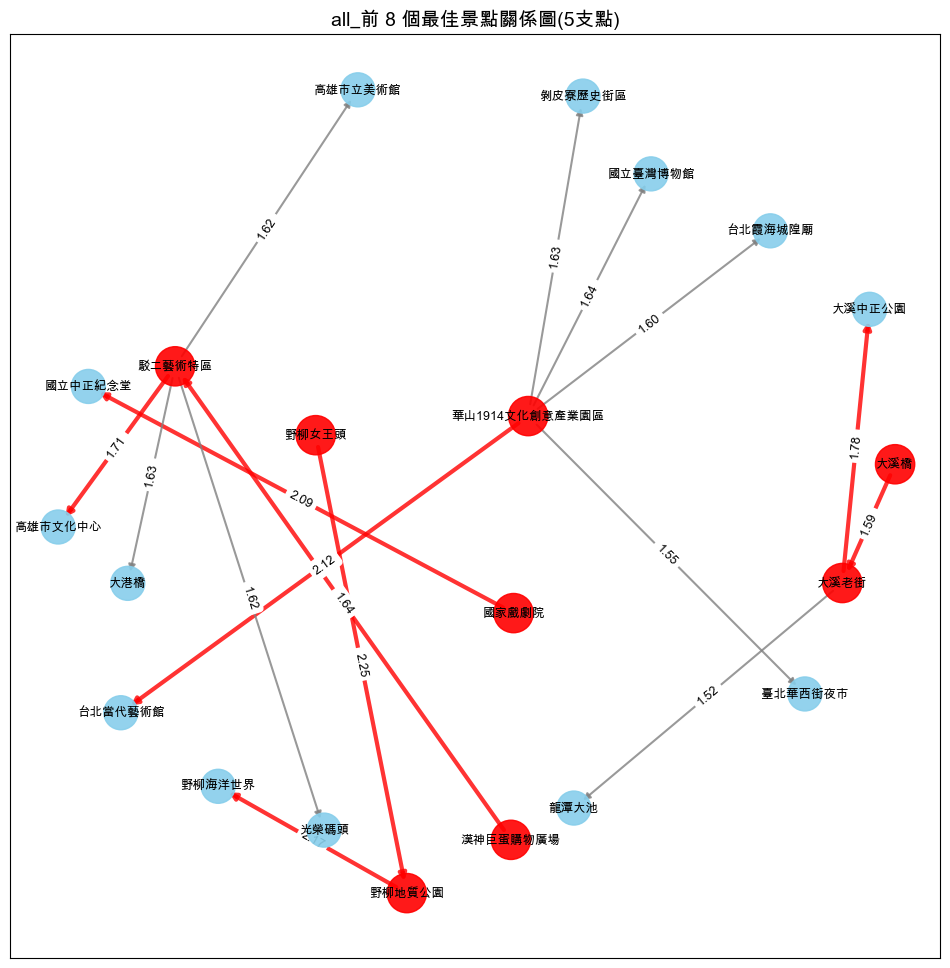

In [71]:
##### Áï´Âúñ
top_spots=8
top_n=5

top_rule = output_all_rule[
        (output_all_rule["ÊîØÊåÅÂ∫¶(Support)"] > 0.05) & 
        (output_all_rule["ÊèêÂçáÂ∫¶(Lift)"] > 1.5) &
        (output_all_rule["‰ø°Ë≥¥Â∫¶(Confidence)"] > 0.5)
    ].sort_values(by="‰ø°Ë≥¥Â∫¶(Confidence)", ascending=False)


# Ë®≠ÂÆö Matplotlib ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac Áî®Êà∂
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å

def plot_top_spots_network(top_rule, top_spots=5, top_n=5, output_path="output_graph.png"):
    """
    Áπ™Ë£ΩÂâç `top_spots` ÂÄãÊôØÈªûÁöÑÊúÄ‰Ω≥ÈóúËÅØÂúñÔºåÊ†πÊìö `ÊèêÂçáÂ∫¶(Lift)` ‰æÜÈ°ØÁ§∫ÂΩ±ÈüøÈóú‰øÇ„ÄÇ
    
    ÂèÉÊï∏:
    - top_rule: (DataFrame) ÈÅéÊøæÂæåÁöÑË¶èÂâáÈóúËÅØË°®
    - top_spots: (int) ÈÅ∏ÊìáÂâçÂπæÂÄã‰ø°Ë≥¥Â∫¶ÊúÄÈ´òÁöÑÊôØÈªû‰ΩúÁÇ∫‰∏≠ÂøÉÈªû
    - top_n: (int) ÊØèÂÄãÊôØÈªûÊúÄÂ§öÈ°ØÁ§∫ÁöÑÈóúËÅØÊôØÈªûÊï∏
    """

    # Âèñ‰ø°Ë≥¥Â∫¶(Confidence)ÊúÄÈ´òÁöÑÂâç `top_spots` ÂÄãÊôØÈªû
    top_attractions = (
        top_rule.groupby("ÊôØÈªû")["‰ø°Ë≥¥Â∫¶(Confidence)"].max()
        .nlargest(top_spots)
        .index.tolist()
    )

    # Âª∫Á´ã NetworkX ÊúâÂêëÂúñ
    G = nx.DiGraph()
    edge_labels = {}  # Â≠òÊîæÊèêÂçáÂ∫¶ (Lift) ÂÄº
    edge_weights = {}  # Â≠òÊîæÈÇäÁöÑÈ°èËâ≤ËàáÁ≤óÁ¥∞
    max_lift_edges = []  # Ë®òÈåÑÊØèÂÄãÊôØÈªûÊúÄÈ´òÁöÑÊèêÂçáÂ∫¶ÈÇä
    node_styles = {}  # Â≠òÊîæÁØÄÈªûÁöÑÈ°èËâ≤ÂíåÂ§ßÂ∞è

    for attraction in top_attractions:
        # ÈÅéÊøæËàáÁï∂ÂâçÊôØÈªûÁõ∏ÈóúÁöÑË¶èÂâá
        related_rules = top_rule[
            (top_rule['ÊôØÈªû'] == attraction)
        ].nlargest(top_n, 'ÊèêÂçáÂ∫¶(Lift)')  # ÂèñÊèêÂçáÂ∫¶ÊúÄÈ´òÁöÑÂâç N ÂÄãÈóúËÅØ

        if related_rules.empty:
            print(f"‚ùå Êâæ‰∏çÂà∞Ëàá {attraction} Áõ∏ÈóúÁöÑÊôØÈªû")
            continue

        # Ê∑ªÂä†‰∏≠ÂøÉÊôØÈªûÔºàÁ¥ÖËâ≤Ôºâ
        node_styles[attraction] = {'size': 800, 'color': 'red'}
        G.add_node(attraction)

        # Ë®òÈåÑÁï∂ÂâçÊôØÈªûÁöÑÊúÄÈ´òÊèêÂçáÂ∫¶
        max_lift = related_rules['ÊèêÂçáÂ∫¶(Lift)'].max()
        max_lift_row = related_rules[related_rules['ÊèêÂçáÂ∫¶(Lift)'] == max_lift].iloc[0]
        max_lift_edge = (attraction, max_lift_row['ÈóúËÅØÊôØÈªû'])
        max_lift_edges.append(max_lift_edge)

        # Ê∑ªÂä†ÈóúËÅØÊôØÈªû
        for _, row in related_rules.iterrows():
            related_spot = row['ÈóúËÅØÊôØÈªû']

            # ‚úÖ Ê™¢Êü•Ë©≤ÈóúËÅØÊôØÈªûÊòØÂê¶‰πüÊòØ‰∏≠ÂøÉÈªûÔºåËã•ÊòØÂâá‰øùÊåÅÁ¥ÖËâ≤
            if related_spot in top_attractions:
                node_styles[related_spot] = {'size': 800, 'color': 'red'}
            else:
                node_styles[related_spot] = {'size': 600, 'color': 'skyblue'}  # Èùû‰∏≠ÂøÉÈªûÊâçË®≠ÁÇ∫ËóçËâ≤
            
            G.add_node(related_spot)
            G.add_edge(attraction, related_spot, weight=row['ÊèêÂçáÂ∫¶(Lift)'])

            # Ë®òÈåÑÊèêÂçáÂ∫¶
            edge_labels[(attraction, related_spot)] = f"{row['ÊèêÂçáÂ∫¶(Lift)']:.2f}"
            edge_weights[(attraction, related_spot)] = row['ÊèêÂçáÂ∫¶(Lift)']

    # Â¶ÇÊûúÊ≤íÊúâ‰ªª‰ΩïÈóúËÅØÊôØÈªûÔºåÂâá‰∏çÁï´Âúñ
    if not G.nodes:
        print("‚ö† Ê≤íÊúâÂèØË¶ñÂåñÁöÑË≥áÊñô")
        return

    # ÂèñÂæóÁØÄÈªûÂ§ßÂ∞èÂíåÈ°èËâ≤
    node_sizes = [node_styles[node]['size'] for node in G.nodes()]
    node_colors = [node_styles[node]['color'] for node in G.nodes()]

    # ‰ΩàÂ±Ä
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=1.5, seed=123)  # ‰ΩøÁØÄÈªûÂàÜ‰ΩàÂùáÂãª

    # Áï´ÁØÄÈªû
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

    # Áï´ÈÇäÔºàÊâÄÊúâÁ∑öÊ¢ùÈ†êË®≠ÁÇ∫ÁÅ∞Ëâ≤Ôºâ
    for edge, lift in edge_weights.items():
        color = 'red' if edge in max_lift_edges else 'gray'  # ÊØèÂÄãÊôØÈªûÁöÑÊúÄÈ´òÊèêÂçáÂ∫¶ÈÇäË®≠ÁÇ∫Á¥ÖËâ≤
        width = 3 if edge in max_lift_edges else 1.5  # ÊúÄÈ´òÊèêÂçáÂ∫¶ÁöÑÁ∑öÊ¢ùËºÉÁ≤ó
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=width, edge_color=color, alpha=0.8, arrows=True)

    # Âä†ÂÖ•ÁØÄÈªûÊ®ôÁ±§ÔºàÊôØÈªûÂêçÁ®±Ôºâ
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='Arial Unicode MS')

    # Âä†ÂÖ•ÈÇäÊ®ôÁ±§ÔºàÊèêÂçáÂ∫¶ Lift ÂÄºÔºâ
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family='Arial Unicode MS')

    plt.title(f"{language}_Ââç {top_spots} ÂÄãÊúÄ‰Ω≥ÊôØÈªûÈóú‰øÇÂúñ({top_n}ÊîØÈªû)", fontsize=14)
    
    # ÂÑ≤Â≠òÂúñÂÉèÁÇ∫Ê™îÊ°à
    plt.savefig(output_path, format="PNG")
    print(f"ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

    plt.show()


# üéØ Âü∑Ë°åÂáΩÂºèÔºåÁπ™Ë£ΩÂâç 10 ÂÄãÊôØÈªûÁöÑÊúÄ‰Ω≥ÈóúËÅØÂúñ
plot_top_spots_network(top_rule, top_spots, top_n, output_path=f"output/{language}_Ââç {top_spots} ÂÄãÊúÄ‰Ω≥ÊôØÈªûÈóú‰øÇÂúñ({top_n}ÊîØÈªû).png")


In [20]:
# top_rule.head(10)

2.‰∏âÂÄãÊåáÊ®ôTOP 5 ÊôØÈªûÁöÑÂâç3Èóú‰øÇÊôØÈªû

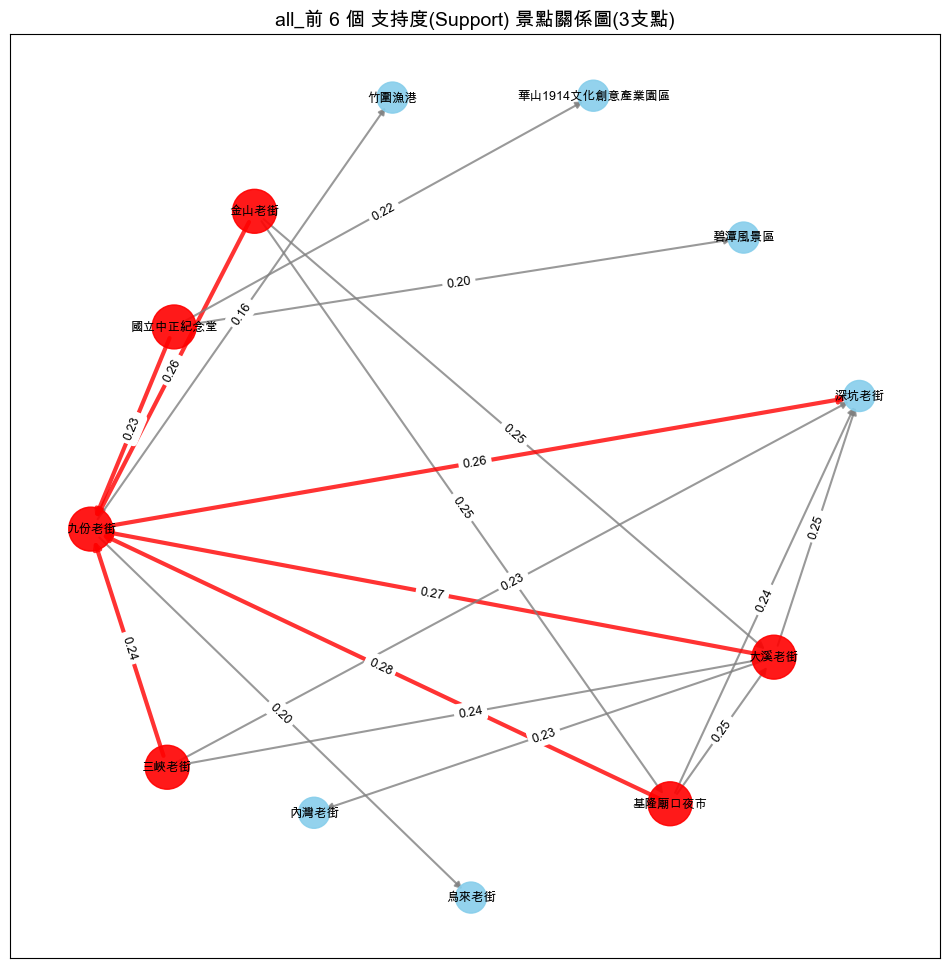

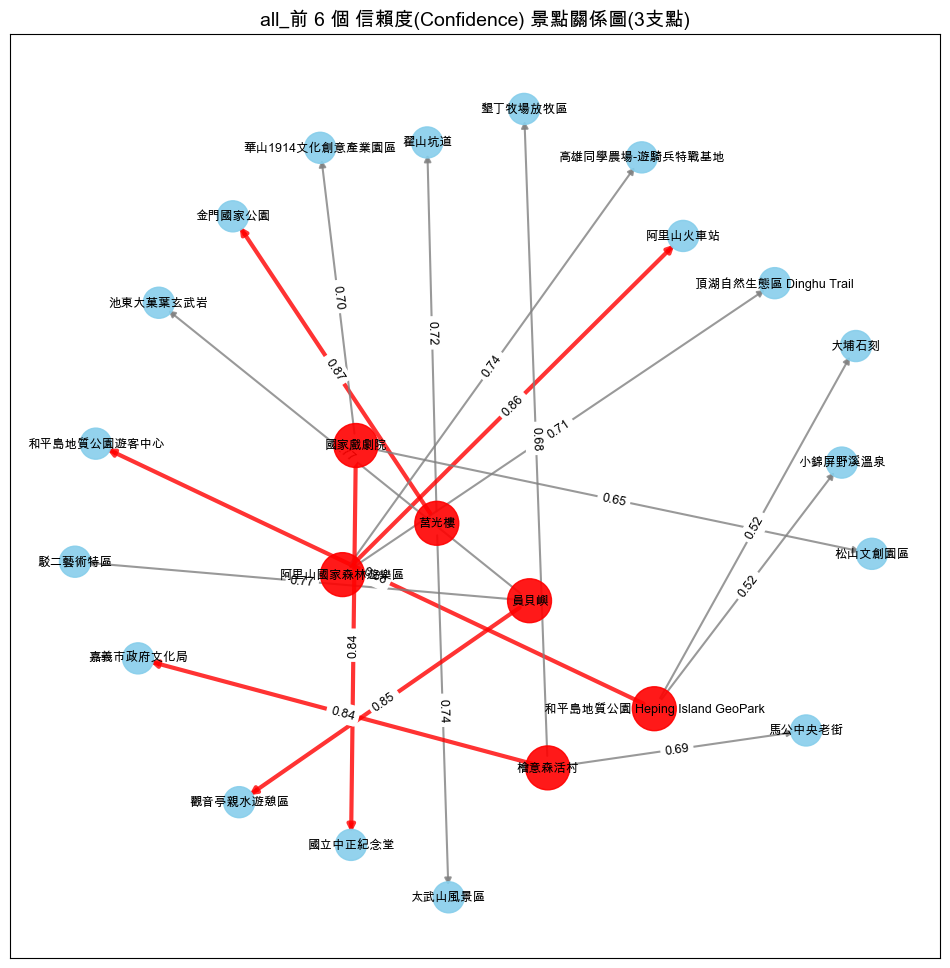

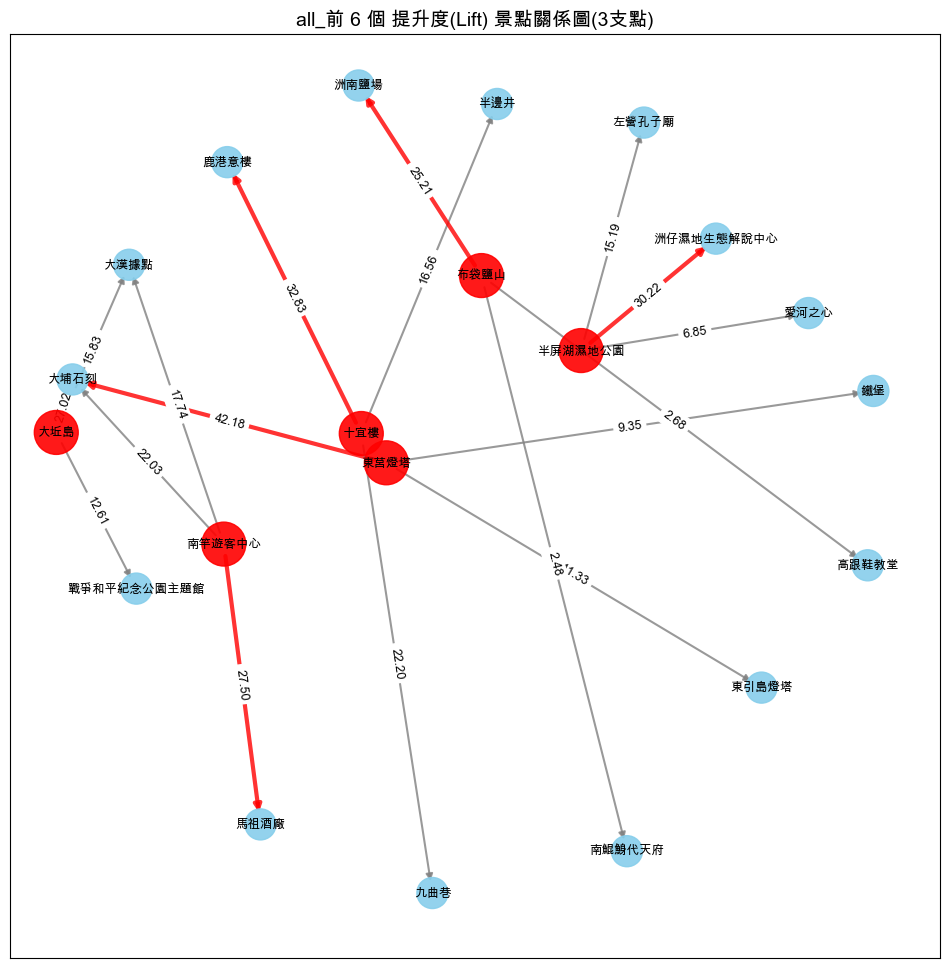

In [70]:
##### ‰∏âÂÄãÊåáÊ®ôTOP 5 ÊôØÈªûÁöÑÂâç3Èóú‰øÇÊôØÈªû
top_spots = 6
top_n = 3

# Ë®≠ÂÆö Matplotlib ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac Áî®Êà∂
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å


def plot_method_network(output_all_rule, method="ÊèêÂçáÂ∫¶(Lift)", top_spots=5, top_n=5, output_path="output_graph.png"):
    """
    Áπ™Ë£Ω‰∏çÂêåÊñπÊ≥ïÁöÑÈóúËÅØÂúñÔºå‰æãÂ¶Ç ÊîØÊåÅÂ∫¶(Support)„ÄÅ‰ø°Ë≥¥Â∫¶(Confidence)„ÄÅÊèêÂçáÂ∫¶(Lift)„ÄÅÊúÄ‰Ω≥Âåñ„ÄÇ

    ÂèÉÊï∏:
    - output_all_rule: (DataFrame) ÂéüÂßãÁöÑË¶èÂâáÈóúËÅØË°®
    - method: (str) ÈÅ∏ÊìáÁöÑË©ï‰º∞ÊñπÊ≥ï ["ÊîØÊåÅÂ∫¶(Support)", "‰ø°Ë≥¥Â∫¶(Confidence)", "ÊèêÂçáÂ∫¶(Lift)", "ÊúÄ‰Ω≥Âåñ"]
    - top_spots: (int) ÈÅ∏ÊìáÂâçÂπæÂÄãÊúÄÈáçË¶ÅÁöÑÊôØÈªû‰ΩúÁÇ∫‰∏≠ÂøÉÈªû
    - top_n: (int) ÊØèÂÄãÊôØÈªûÊúÄÂ§öÈ°ØÁ§∫ÁöÑÈóúËÅØÊôØÈªûÊï∏
    """

    methods = ["ÊîØÊåÅÂ∫¶(Support)", "‰ø°Ë≥¥Â∫¶(Confidence)", "ÊèêÂçáÂ∫¶(Lift)"]

    if method not in methods:
        raise ValueError(f"‚ùå ÁÑ°ÊïàÁöÑË©ï‰º∞ÊñπÊ≥ï: {method}, Âè™ËÉΩÈÅ∏Êìá {methods}")

    # Ê†πÊìöÊâÄÈÅ∏ÊñπÊ≥ïÁØ©ÈÅ∏Êï∏Êìö
    top_rule = output_all_rule.sort_values(by=method, ascending=False)


    # Âèñ `top_spots` ÂÄãÊúÄÈ´òÊ¨äÈáçÁöÑÊôØÈªû
    top_attractions = (
        top_rule.groupby("ÊôØÈªû")[method].max()
        .nlargest(top_spots)
        .index.tolist()
    )

    # Âª∫Á´ã NetworkX ÊúâÂêëÂúñ
    G = nx.DiGraph()
    edge_labels = {}
    edge_weights = {}
    max_method_edges = []
    node_styles = {}

    for attraction in top_attractions:
        # ÈÅéÊøæËàáÁï∂ÂâçÊôØÈªûÁõ∏ÈóúÁöÑË¶èÂâá
        related_rules = top_rule[
            (top_rule['ÊôØÈªû'] == attraction)
        ].nlargest(top_n, method)

        if related_rules.empty:
            print(f"‚ùå Êâæ‰∏çÂà∞Ëàá {attraction} Áõ∏ÈóúÁöÑÊôØÈªû")
            continue

        # Ê∑ªÂä†‰∏≠ÂøÉÊôØÈªûÔºàÁ¥ÖËâ≤Ôºâ
        node_styles[attraction] = {'size': 1000, 'color': 'red'}
        G.add_node(attraction)

        # Ë®òÈåÑÁï∂ÂâçÊôØÈªûÁöÑÊúÄÈ´òÂÄº
        max_method_value = related_rules[method].max()
        max_method_row = related_rules[related_rules[method] == max_method_value].iloc[0]
        max_method_edge = (attraction, max_method_row['ÈóúËÅØÊôØÈªû'])
        max_method_edges.append(max_method_edge)

        # Ê∑ªÂä†ÈóúËÅØÊôØÈªû
        for _, row in related_rules.iterrows():
            related_spot = row['ÈóúËÅØÊôØÈªû']

            # ‚úÖ Ëã•Ë©≤ÊôØÈªû‰πüÊòØ‰∏≠ÂøÉÈªûÔºåÂâá‰øùÊåÅÁ¥ÖËâ≤
            if related_spot in top_attractions:
                node_styles[related_spot] = {'size': 1000, 'color': 'red'}
            else:
                node_styles[related_spot] = {'size': 500, 'color': 'skyblue'}  # Èùû‰∏≠ÂøÉÈªûÁÇ∫ËóçËâ≤
            
            G.add_node(related_spot)
            G.add_edge(attraction, related_spot, weight=row[method])

            # Ë®òÈåÑÊñπÊ≥ïÂÄº
            edge_labels[(attraction, related_spot)] = f"{row[method]:.2f}"
            edge_weights[(attraction, related_spot)] = row[method]

    # Â¶ÇÊûúÊ≤íÊúâ‰ªª‰ΩïÈóúËÅØÊôØÈªûÔºåÂâá‰∏çÁï´Âúñ
    if not G.nodes:
        print("‚ö† Ê≤íÊúâÂèØË¶ñÂåñÁöÑË≥áÊñô")
        return

    # ÂèñÂæóÁØÄÈªûÂ§ßÂ∞èÂíåÈ°èËâ≤
    node_sizes = [node_styles[node]['size'] for node in G.nodes()]
    node_colors = [node_styles[node]['color'] for node in G.nodes()]

    # ‰ΩàÂ±Ä
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=1.5, seed=123)

    # Áï´ÁØÄÈªû
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

    # Áï´ÈÇäÔºàÊâÄÊúâÁ∑öÊ¢ùÈ†êË®≠ÁÇ∫ÁÅ∞Ëâ≤Ôºâ
    for edge, value in edge_weights.items():
        color = 'red' if edge in max_method_edges else 'gray'  # ÊúÄÈ´òÂÄºÁöÑÈÇäÊ®ôÁ¥ÖËâ≤
        width = 3 if edge in max_method_edges else 1.5  # ÊúÄÈ´òÂÄºÁöÑÁ∑öÊ¢ùËºÉÁ≤ó
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=width, edge_color=color, alpha=0.8, arrows=True)

    # Âä†ÂÖ•ÁØÄÈªûÊ®ôÁ±§ÔºàÊôØÈªûÂêçÁ®±Ôºâ
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='Arial Unicode MS')

    # Âä†ÂÖ•ÈÇäÊ®ôÁ±§ÔºàÊñπÊ≥ïÂÄºÔºâ
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family='Arial Unicode MS')

    plt.title(f"{language}_Ââç {top_spots} ÂÄã {method} ÊôØÈªûÈóú‰øÇÂúñ({top_n}ÊîØÈªû)", fontsize=14)
    
    # # ÂÑ≤Â≠òÂúñÂÉèÁÇ∫Ê™îÊ°à
    # plt.savefig(output_path, format="PNG")
    # print(f"ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

    plt.show()


# üéØ Ê∏¨Ë©¶ÔºöÁπ™Ë£Ω‰∏çÂêåÊñπÊ≥ïÁöÑÂúñ
plot_method_network(output_all_rule, method="ÊîØÊåÅÂ∫¶(Support)", top_spots=top_spots, top_n=top_n, output_path=f"output/{language}_Ââç {top_spots} ÂÄã ÊîØÊåÅÂ∫¶(Support)ÊôØÈªûÈóú‰øÇÂúñ({top_n}ÊîØÈªû).png")
plot_method_network(output_all_rule, method="‰ø°Ë≥¥Â∫¶(Confidence)", top_spots=top_spots, top_n=top_n, output_path=f"output/{language}_Ââç {top_spots} ÂÄã ‰ø°Ë≥¥Â∫¶(Confidence)ÊôØÈªûÈóú‰øÇÂúñ({top_n}ÊîØÈªû).png")
plot_method_network(output_all_rule, method="ÊèêÂçáÂ∫¶(Lift)", top_spots=top_spots, top_n=top_n, output_path=f"output/{language}_Ââç {top_spots} ÂÄã ÊèêÂçáÂ∫¶(Lift)ÊôØÈªûÈóú‰øÇÂúñ({top_n}ÊîØÈªû).png")


### ÂäüËÉΩ
1.Ëº∏ÂÖ• xxx Áµ¶ÊúÄ‰Ω≥‰∏ã‰∏ÄÂÄãÊôØÈªû

ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ output/ÊôØÈªûÈóúËÅØÂúñ_all.png


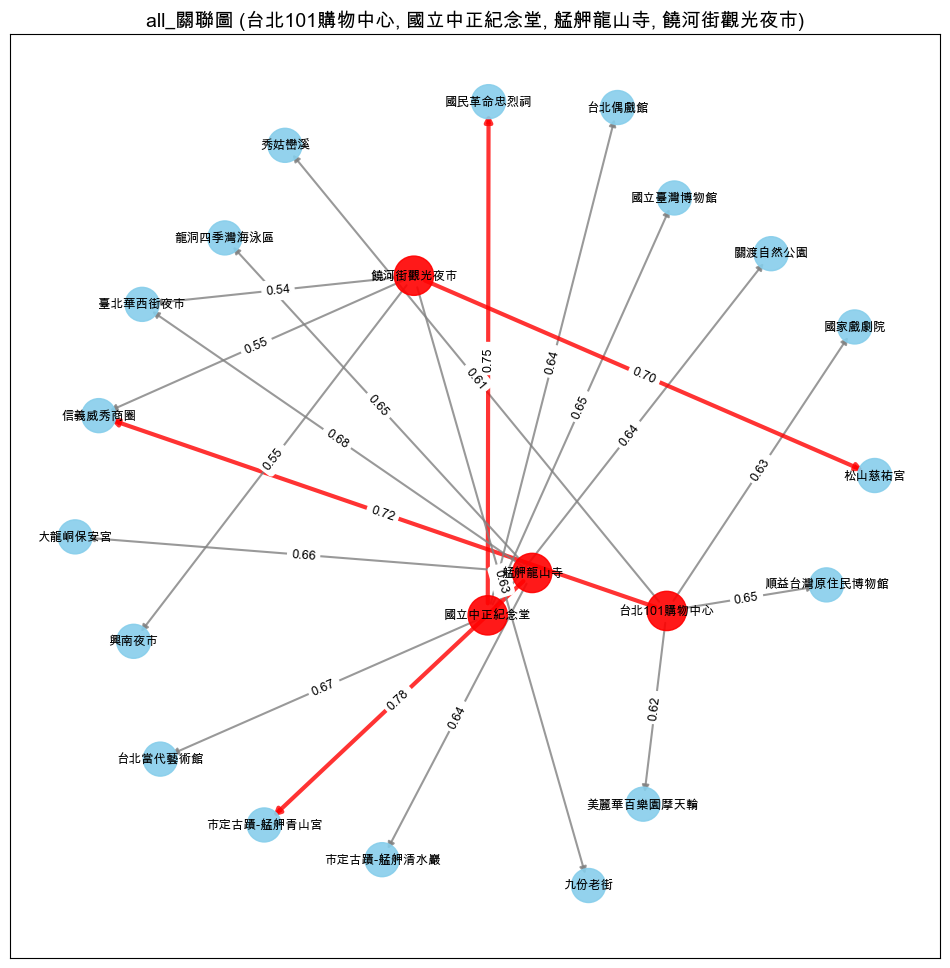

ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ output/ÊôØÈªûÈóúËÅØÂúñ_ko.png


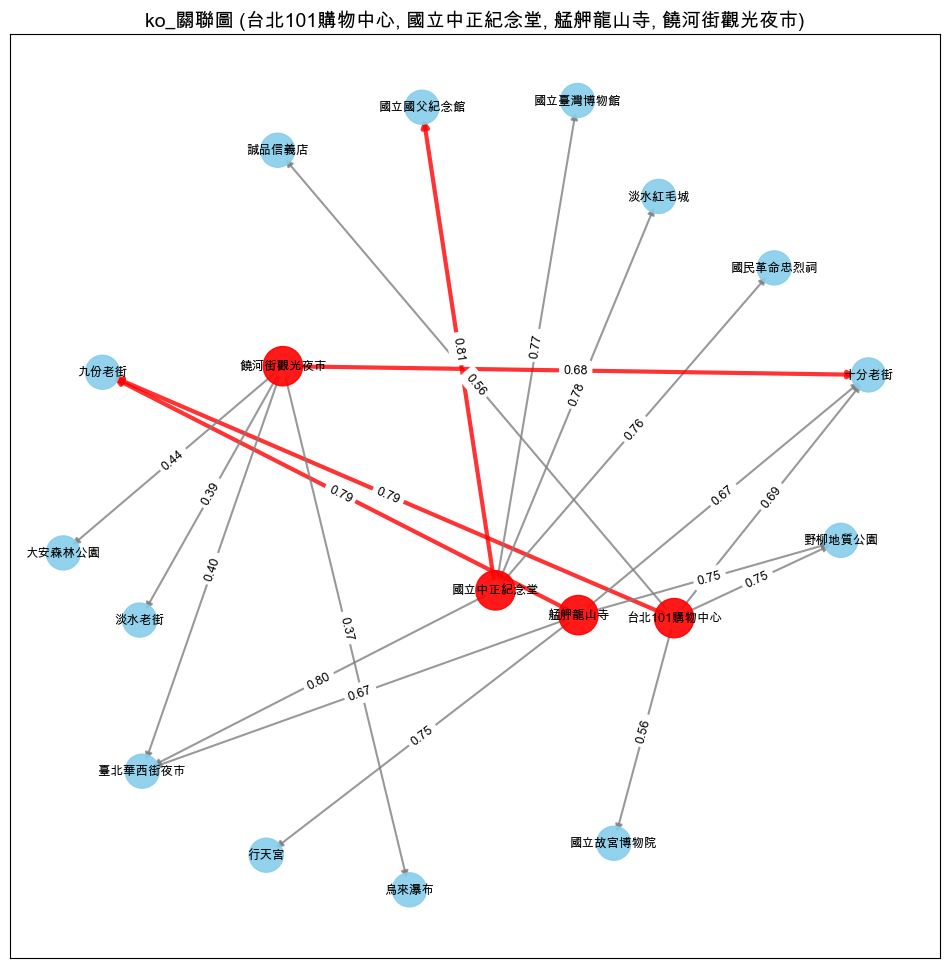

ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ output/ÊôØÈªûÈóúËÅØÂúñ_en.png


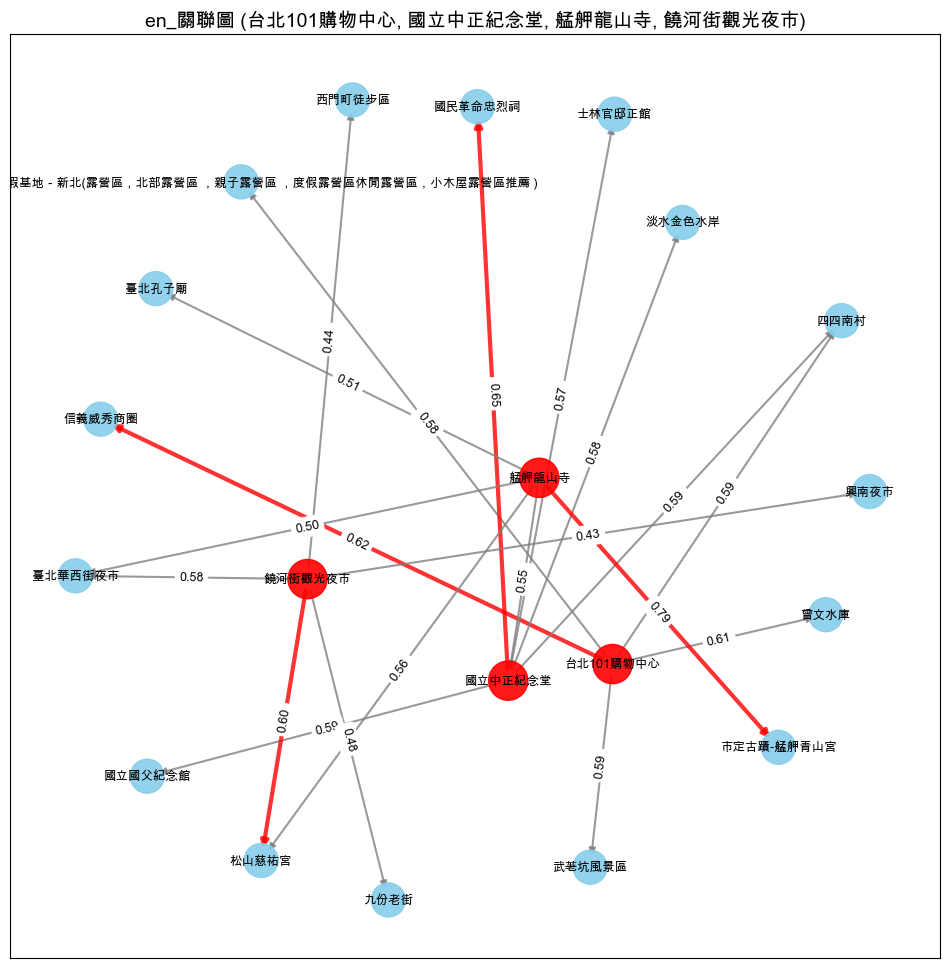

ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ output/ÊôØÈªûÈóúËÅØÂúñ_ja.png


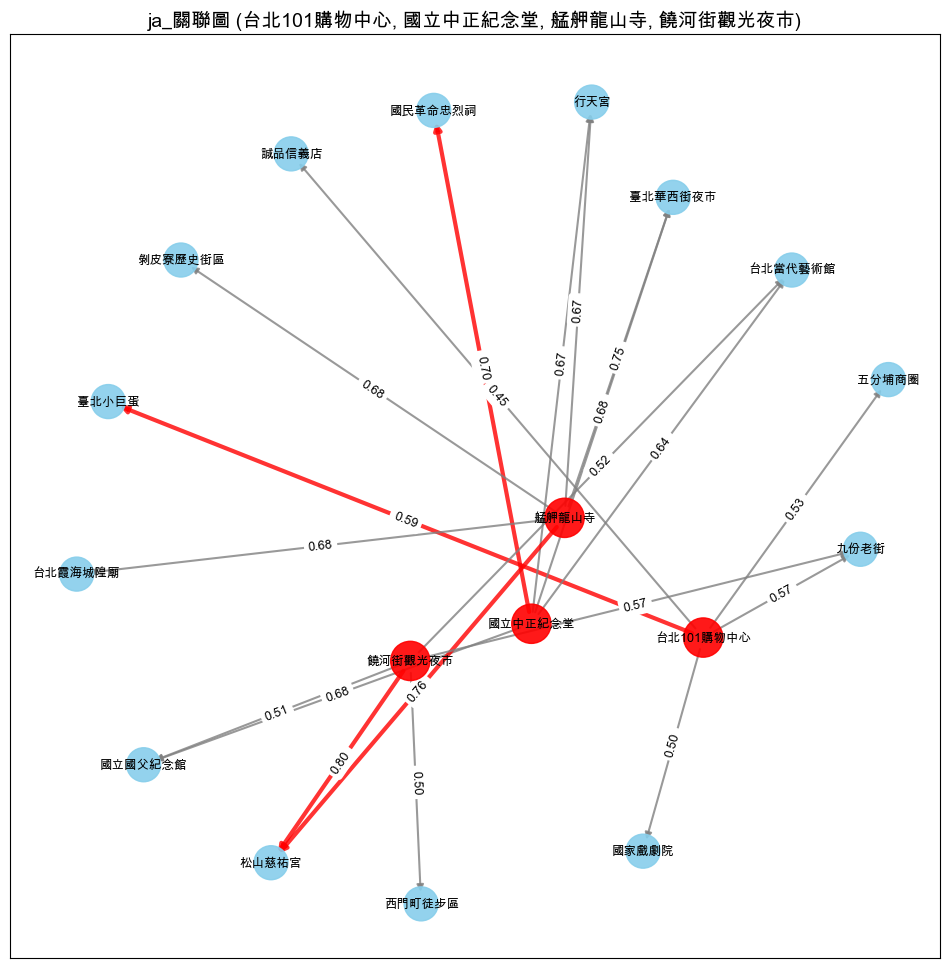

ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ output/ÊôØÈªûÈóúËÅØÂúñ_zh-Hant.png


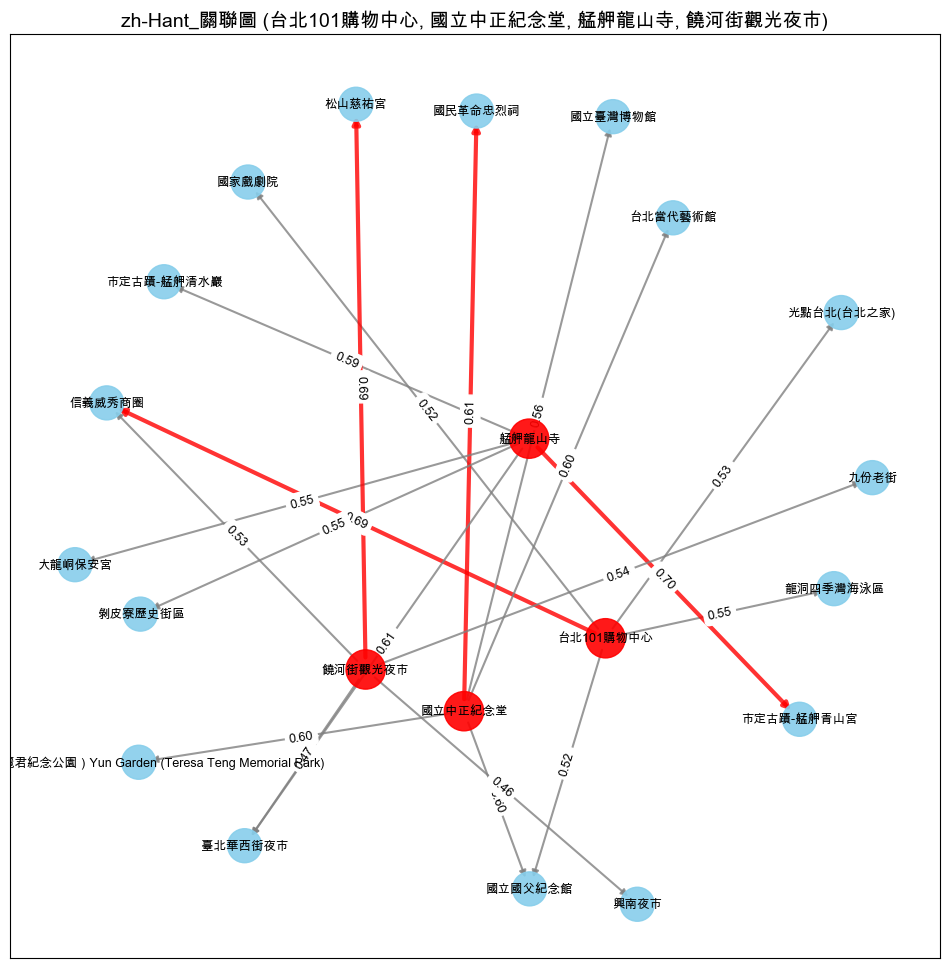

Ê™îÊ°àÂêçÁ®±         ÊôØÈªû        ÈóúËÅØÊôØÈªû  ÊîØÊåÅÂ∫¶(Support)  ‰ø°Ë≥¥Â∫¶(Confidence)  ÊèêÂçáÂ∫¶(Lift)  \
0       all  Âè∞Âåó101Ë≥ºÁâ©‰∏≠ÂøÉ      ‰ø°Áæ©Â®ÅÁßÄÂïÜÂúà      0.028186         0.718750   1.952211   
1       all  Âè∞Âåó101Ë≥ºÁâ©‰∏≠ÂøÉ  È†ÜÁõäÂè∞ÁÅ£Âéü‰ΩèÊ∞ëÂçöÁâ©È§®      0.004902         0.651163   1.768636   
2       all  Âè∞Âåó101Ë≥ºÁâ©‰∏≠ÂøÉ       ÂúãÂÆ∂Êà≤ÂäáÈô¢      0.040091         0.627397   1.704086   
3       all  Âè∞Âåó101Ë≥ºÁâ©‰∏≠ÂøÉ   ÁæéÈ∫óËèØÁôæÊ®ÇÂúíÊë©Â§©Ëº™      0.109944         0.624254   1.695550   
4       all  Âè∞Âåó101Ë≥ºÁâ©‰∏≠ÂøÉ        ÁßÄÂßëÂ∑íÊ∫™      0.002976         0.607143   1.649073   
..      ...        ...         ...           ...              ...        ...   
95  zh-Hant    È•íÊ≤≥Ë°óËßÄÂÖâÂ§úÂ∏Ç       ÊùæÂ±±ÊÖàÁ•êÂÆÆ      0.023408         0.685092   2.833952   
96  zh-Hant    È•íÊ≤≥Ë°óËßÄÂÖâÂ§úÂ∏Ç        ‰πù‰ªΩËÄÅË°ó      0.129571         0.535985   1.377042   
97  zh-Hant    È•íÊ≤≥Ë°óËßÄÂÖâÂ§úÂ∏Ç      ‰ø°Áæ©Â®ÅÁßÄÂïÜÂúà      0.013278         0.527273   2.181117   
98  zh-Hant    È•íÊ≤≥Ë°óËßÄÂÖâÂ§úÂ∏Ç     Ëá∫ÂåóËèØË•øË°óÂ§úÂ∏Ç      0.029073         0.468635   1.938554   
99  zh-Hant    È•íÊ≤≥Ë°óËßÄÂÖâÂ§úÂ∏Ç        ËààÂçóÂ§úÂ∏Ç      0.020317         0.461039   1.907134   

    ÊôØÈªû_È°ûÂà•  ÈóúËÅØÊôØÈªû_È°ûÂà•                     ÊôØÈªû_Á∂ìÁ∑ØÂ∫¶                   ÈóúËÅØÊôØÈªû_Á∂ìÁ∑ØÂ∫¶  \
0    ÂüéÂ∏ÇÊôØËßÄ    Ë≥ºÁâ©ËàáÁæéÈ£ü   (25.034127, 121.5614409)  (25.0352187, 121.5646566)   
1    ÂüéÂ∏ÇÊôØËßÄ     ‰∫∫ÊñáÊ≠∑Âè≤   (25.034127, 121.5614409)  (25.1009833, 121.5494039)   
2    ÂüéÂ∏ÇÊôØËßÄ     ÂüéÂ∏ÇÊôØËßÄ   (25.034127, 121.5614409)   (25.035305, 121.5181598)   
3    ÂüéÂ∏ÇÊôØËßÄ    Ë≥ºÁâ©ËàáÁæéÈ£ü   (25.034127, 121.5614409)  (25.0829319, 121.5577484)   
4    ÂüéÂ∏ÇÊôØËßÄ  Ëá™ÁÑ∂ÊôØËßÄËàáÊà∂Â§ñ   (25.034127, 121.5614409)   (23.3249405, 121.012243)   
..    ...      ...                        ...                        ...   
95  Ë≥ºÁâ©ËàáÁæéÈ£ü     ÂÆóÊïôËÅñÂú∞  (25.0508902, 121.5749088)    (25.0512182, 121.57769)   
96  Ë≥ºÁâ©ËàáÁæéÈ£ü     ‰∫∫ÊñáÊ≠∑Âè≤  (25.0508902, 121.5749088)  (25.1098743, 121.8403171)   
97  Ë≥ºÁâ©ËàáÁæéÈ£ü    Ë≥ºÁâ©ËàáÁæéÈ£ü  (25.0508902, 121.5749088)  (25.0352187, 121.5646566)   
98  Ë≥ºÁâ©ËàáÁæéÈ£ü    Ë≥ºÁâ©ËàáÁæéÈ£ü  (25.0508902, 121.5749088)  (25.0386036, 121.4958623)   
99  Ë≥ºÁâ©ËàáÁæéÈ£ü    Ë≥ºÁâ©ËàáÁæéÈ£ü  (25.0508902, 121.5749088)  (24.9899688, 121.5107306)   

        Ë∑ùÈõ¢(km)                                  ÊôØÈªû_id  \
0     0.346333  0x3442abb6da80a7ad:0xacc4d11dc963103c   
1     7.504850  0x3442abb6da80a7ad:0xacc4d11dc963103c   
2     4.369951  0x3442abb6da80a7ad:0xacc4d11dc963103c   
3     5.419125  0x3442abb6da80a7ad:0xacc4d11dc963103c   
4   197.363550  0x3442abb6da80a7ad:0xacc4d11dc963103c   
..         ...                                    ...   
95    0.282988  0x3442ab9c0db4a583:0x3da21183815df6f6   
96   27.561220  0x3442ab9c0db4a583:0x3da21183815df6f6   
97    2.020903  0x3442ab9c0db4a583:0x3da21183815df6f6   
98    8.092137  0x3442ab9c0db4a583:0x3da21183815df6f6   
99    9.354281  0x3442ab9c0db4a583:0x3da21183815df6f6   

                                  ÈóúËÅØÊôØÈªû_id       Ë™ûÁ≥ª  
0   0x3442abb0bca8f597:0xf776e49ddb067b30      all  
1   0x3442ac3bab42f751:0x839262f97eb2d2b8      all  
2   0x3442a99e1c9b0373:0x99b7a63a01e8db42      all  
3   0x3442ac12f6cf7d73:0x4d733f290725ce21      all  
4   0x346f6a6d5f66b3cd:0xadc5174cf9ed1c5b      all  
..                                    ...      ...  
95   0x3442ab9c6d479ecb:0xe9dd0be65263781  zh-Hant  
96  0x345d4517fafb9471:0x5f15825aa6a4a7d2  zh-Hant  
97  0x3442abb0bca8f597:0xf776e49ddb067b30  zh-Hant  
98  0x3442a9a940c8f96b:0x6aee182d28c2fb39  zh-Hant  
99  0x34680273997671bd:0xdc9fa4291d650c85  zh-Hant  

[100 rows x 14 columns]

In [ ]:
##### Ëº∏ÂÖ•ÊôØÈªû->Áï´Âá∫ÂêÑË™ûÁ≥ªÈóú‰øÇÂúñÂèädatafrmae

# merged_rules.csv ÂåÖÂê´ÊâÄÊúâË™ûÁ≥ª
output_all_rule = pd.read_csv("output/merged_rules.csv", encoding="utf-8")

# ‰ΩøÁî®ËÄÖËº∏ÂÖ•ÁöÑÊôØÈªûÂêçÁ®±
input_locations = ["Âè∞Âåó101Ë≥ºÁâ©‰∏≠ÂøÉ", "ÂúãÁ´ã‰∏≠Ê≠£Á¥ÄÂøµÂ†Ç", "ËâãËà∫ÈæçÂ±±ÂØ∫", "È•íÊ≤≥Ë°óËßÄÂÖâÂ§úÂ∏Ç"]

# Ë®≠ÂÆö Matplotlib ‰∏≠ÊñáÂ≠óÈ´î
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac Áî®Êà∂
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†ËôüÈ°ØÁ§∫ÂïèÈ°å

def plot_and_output_related_spots(input_locations, output_all_rule, language, top_n=5, output_path="output_graph.png"):
    """
    Ê†πÊìöËá™Ë®ÇÁöÑÊôØÈªûÂàóË°®ÔºåÁπ™Ë£ΩÈóúËÅØÂúñ‰∏¶Ëº∏Âá∫Áõ∏ÈóúÊôØÈªûÁöÑË≥áÊñôÔºå‰øùÁïôÊâÄÊúâÂéüÊ¨Ñ‰Ωç„ÄÇ
    
    ÂèÉÊï∏:
    - input_locations: (list) ‰ΩøÁî®ËÄÖËº∏ÂÖ•ÁöÑÊôØÈªûÂàóË°®
    - output_all_rule: (DataFrame) Ë¶èÂâáÈóúËÅØË≥áÊñôË°®
    - language: (str) ÈúÄË¶ÅËôïÁêÜÁöÑË™ûÁ≥ª
    - top_n: (int) ÊØèÂÄãÊôØÈªûÊúÄÂ§öÈ°ØÁ§∫ÁöÑÈóúËÅØÊôØÈªûÊï∏
    - output_path: (str) ÂúñÂÉèËº∏Âá∫Ë∑ØÂæë
    """
    
    # ÈÅéÊøæÂá∫ËàáËº∏ÂÖ•ÊôØÈªûÁõ∏ÈóúÁöÑË¶èÂâáÔºå‰∏¶ÈÅ∏ÊìáÂ∞çÊáâË™ûÁ≥ªÁöÑË≥áÊñô
    related_rules = output_all_rule[output_all_rule['Ê™îÊ°àÂêçÁ®±'] == language]
    related_rules = related_rules[related_rules['ÊôØÈªû'].isin(input_locations)]

    if related_rules.empty:
        print(f"‚ùå Êâæ‰∏çÂà∞ËàáËº∏ÂÖ•ÊôØÈªû {input_locations} Áõ∏ÈóúÁöÑË≥áÊñô ({language})")
        return pd.DataFrame()  # Â¶ÇÊûúÊ≤íÊúâË≥áÊñôÔºåËøîÂõûÁ©∫ DataFrame

    # Âª∫Á´ã NetworkX ÊúâÂêëÂúñ
    G = nx.DiGraph()
    edge_labels = {}  # Â≠òÊîæ‰ø°Ë≥¥Â∫¶ (Confidence) ÂÄº
    edge_weights = {}  # Â≠òÊîæÈÇäÁöÑÈ°èËâ≤ËàáÁ≤óÁ¥∞
    max_confidence_edges = []  # Ë®òÈåÑÊØèÂÄãÊôØÈªûÊúÄÈ´òÁöÑ‰ø°Ë≥¥Â∫¶ÈÇä
    node_styles = {}  # Â≠òÊîæÁØÄÈªûÁöÑÈ°èËâ≤ÂíåÂ§ßÂ∞è
    all_related_spots = []  # Áî®ÊñºÂ≠òÊîæÊâÄÊúâÁõ∏ÈóúÊôØÈªûÁöÑË≥áÊñô

    for attraction in input_locations:
        # ÈÅéÊøæËàáÁï∂ÂâçÊôØÈªûÁõ∏ÈóúÁöÑË¶èÂâá
        related_spots = related_rules[related_rules['ÊôØÈªû'] == attraction]
        
        if related_spots.empty:
            print(f"‚ùå Êâæ‰∏çÂà∞Ëàá {attraction} Áõ∏ÈóúÁöÑÊôØÈªû")
            continue
        
        # Êåâ‰ø°Ë≥¥Â∫¶ÊéíÂ∫è‰∏¶ÈÅ∏ÊìáÂâç `top_n` ÂÄãÈóúËÅØÊôØÈªû
        related_spots = related_spots.nlargest(top_n, '‰ø°Ë≥¥Â∫¶(Confidence)')

        # Ê∑ªÂä†‰∏≠ÂøÉÊôØÈªûÔºàÁ¥ÖËâ≤Ôºâ
        node_styles[attraction] = {'size': 800, 'color': 'red'}
        G.add_node(attraction)

        # Ë®òÈåÑÁï∂ÂâçÊôØÈªûÁöÑÊúÄÈ´ò‰ø°Ë≥¥Â∫¶
        max_confidence = related_spots['‰ø°Ë≥¥Â∫¶(Confidence)'].max()
        max_confidence_row = related_spots[related_spots['‰ø°Ë≥¥Â∫¶(Confidence)'] == max_confidence].iloc[0]
        max_confidence_edge = (attraction, max_confidence_row['ÈóúËÅØÊôØÈªû'])
        max_confidence_edges.append(max_confidence_edge)

        # Ê∑ªÂä†ÈóúËÅØÊôØÈªû‰∏¶Ë®òÈåÑÁõ∏ÈóúË≥áÊñô
        for _, row in related_spots.iterrows():
            related_spot = row['ÈóúËÅØÊôØÈªû']

            # ‚úÖ Ê™¢Êü•Ë©≤ÈóúËÅØÊôØÈªûÊòØÂê¶‰πüÊòØ‰∏≠ÂøÉÈªûÔºåËã•ÊòØÂâá‰øùÊåÅÁ¥ÖËâ≤
            if related_spot in input_locations:
                node_styles[related_spot] = {'size': 800, 'color': 'red'}
            else:
                node_styles[related_spot] = {'size': 600, 'color': 'skyblue'}  # Èùû‰∏≠ÂøÉÈªûË®≠ÁÇ∫ËóçËâ≤
            
            G.add_node(related_spot)
            G.add_edge(attraction, related_spot, weight=row['‰ø°Ë≥¥Â∫¶(Confidence)'])

            # Ë®òÈåÑ‰ø°Ë≥¥Â∫¶
            edge_labels[(attraction, related_spot)] = f"{row['‰ø°Ë≥¥Â∫¶(Confidence)']:.2f}"
            edge_weights[(attraction, related_spot)] = row['‰ø°Ë≥¥Â∫¶(Confidence)']

            # Ë®òÈåÑÊâÄÊúâÁõ∏ÈóúÊôØÈªûÁöÑË≥áÊñô
            all_related_spots.append(row)  # ÈÄôÊ®£ÊúÉ‰øùÁïôÊØè‰∏ÄË°åÊâÄÊúâÂéüÂßãË≥áÊñô

    # Â¶ÇÊûúÊ≤íÊúâ‰ªª‰ΩïÈóúËÅØÊôØÈªûÔºåÂâá‰∏çÁï´Âúñ
    if not G.nodes:
        print("‚ö† Ê≤íÊúâÂèØË¶ñÂåñÁöÑË≥áÊñô")
        return pd.DataFrame()  # ËøîÂõûÁ©∫ DataFrame

    # ÂèñÂæóÁØÄÈªûÂ§ßÂ∞èÂíåÈ°èËâ≤
    node_sizes = [node_styles[node]['size'] for node in G.nodes()]
    node_colors = [node_styles[node]['color'] for node in G.nodes()]

    # ‰ΩàÂ±Ä
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=1.5, seed=123)  # ‰ΩøÁØÄÈªûÂàÜ‰ΩàÂùáÂãª

    # Áï´ÁØÄÈªû
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

    # Áï´ÈÇäÔºàÊâÄÊúâÁ∑öÊ¢ùÈ†êË®≠ÁÇ∫ÁÅ∞Ëâ≤Ôºâ
    for edge, confidence in edge_weights.items():
        color = 'red' if edge in max_confidence_edges else 'gray'  # ÊØèÂÄãÊôØÈªûÁöÑÊúÄÈ´ò‰ø°Ë≥¥Â∫¶ÈÇäË®≠ÁÇ∫Á¥ÖËâ≤
        width = 3 if edge in max_confidence_edges else 1.5  # ÊúÄÈ´ò‰ø°Ë≥¥Â∫¶ÁöÑÁ∑öÊ¢ùËºÉÁ≤ó
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=width, edge_color=color, alpha=0.8, arrows=True)

    # Âä†ÂÖ•ÁØÄÈªûÊ®ôÁ±§ÔºàÊôØÈªûÂêçÁ®±Ôºâ
    nx.draw_networkx_labels(G, pos, font_size=9, font_family='Arial Unicode MS')

    # Âä†ÂÖ•ÈÇäÊ®ôÁ±§Ôºà‰ø°Ë≥¥Â∫¶ Confidence ÂÄºÔºâ
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, font_family='Arial Unicode MS')

    plt.title(f"{language}_ÈóúËÅØÂúñ ({', '.join(input_locations)})", fontsize=14)

    # ÂÑ≤Â≠òÂúñÂÉèÁÇ∫Ê™îÊ°à
    plt.savefig(output_path, format="PNG")
    print(f"ÂúñÂÉèÂ∑≤ÂÑ≤Â≠òÁÇ∫ {output_path}")

    # È°ØÁ§∫ÂúñÂÉè
    plt.show()

    # Â∞áÊâÄÊúâÈóúËÅØÊôØÈªûË≥áÊñôËΩâÊèõÁÇ∫ DataFrame ‰∏¶ÂõûÂÇ≥
    related_spots_df = pd.DataFrame(all_related_spots)

    # ‰øùÁïôËàáÂéüË≥áÊñôÈõÜ‰∏ÄËá¥ÁöÑÊâÄÊúâÊ¨Ñ‰Ωç
    related_spots_df['Ë™ûÁ≥ª'] = language  # Êñ∞Â¢ûË™ûÁ≥ªÊ¨Ñ‰Ωç
    return related_spots_df


# ÂÆöÁæ©Ë™ûÁ≥ªÂàóË°®
languages = ['all', 'ko', 'en', 'ja', 'zh-Hant']
all_related_spots = []  # Áî®‰æÜÂåØÁ∏ΩÊâÄÊúâË™ûÁ≥ªÁöÑÁµêÊûú

# Âü∑Ë°åÂáΩÂºèÔºåÁπ™Ë£ΩÂêÑË™ûÁ≥ªÁöÑÈóúËÅØÂúñ‰∏¶ÂåØÁ∏ΩË≥áÊñô
for language in languages:
    related_spots_df = plot_and_output_related_spots(input_locations, output_all_rule, language, top_n=5, output_path=f"output/ÊôØÈªûÈóúËÅØÂúñ_{language}.png")
    
    if not related_spots_df.empty:
        all_related_spots.append(related_spots_df)

# Â∞áÊâÄÊúâË™ûÁ≥ªÁöÑÁµêÊûúÂêà‰ΩµÊàê‰∏ÄÂÄã DataFrame
final_related_spots_df = pd.concat(all_related_spots, ignore_index=True)

# È°ØÁ§∫ÊúÄÁµÇÁöÑÁµêÊûú
final_related_spots_df


In [111]:
##### Ë®àÁÆó838ÊôØÈªûÈóúËÅØÁ®ãÂ∫¶È´ò‰∏çÈ´òÔºåÊòØÂê¶ÈÅîÊàêÊóÖÂÆ¢ÊóÖÈÅäÊôØÈªûÁöÑÂèÉËÄÉ‰æùÊìö?

# ËºâÂÖ•Ë≥áÊñô
output_all_rule = pd.read_csv("output/merged_rules.csv", encoding="utf-8")

# ÁØ©ÈÅ∏Á¨¶ÂêàÊ¢ù‰ª∂ÁöÑË≥áÊñô
filtered_rules = output_all_rule[(output_all_rule['ÊèêÂçáÂ∫¶(Lift)'] >= 1) & 
                                  (output_all_rule['‰ø°Ë≥¥Â∫¶(Confidence)'] >= 0.5)]

# ÂÆöÁæ©Ë™ûÁ≥ªÂàóË°®
languages = ['all', 'ko', 'en', 'ja', 'zh-Hant']

# Áî®‰æÜÂÑ≤Â≠òÁµêÊûú
result = {}

# Á∏ΩÊôØÈªûÊï∏Èáè
total_sights = 838

for language in languages:
    # ÈÅéÊøæÂá∫Áï∂ÂâçË™ûÁ≥ªÁöÑË≥áÊñô
    language_data = filtered_rules[filtered_rules['Ê™îÊ°àÂêçÁ®±'] == language]
    
    # Ë®àÁÆó‰∏çÈáçË§áÁöÑÊôØÈªûÊï∏Èáè
    unique_sights_count = language_data['ÊôØÈªû'].nunique()
    
    # Ë®àÁÆóÊØî‰æã
    proportion = unique_sights_count / total_sights * 100
    
    # ÂÑ≤Â≠òÁµêÊûú
    result[language] = {'count': unique_sights_count, 'proportion': proportion}

# È°ØÁ§∫ÁµêÊûú
result


{'all': {'count': 541, 'proportion': 64.55847255369929},
 'ko': {'count': 47, 'proportion': 5.608591885441527},
 'en': {'count': 102, 'proportion': 12.17183770883055},
 'ja': {'count': 64, 'proportion': 7.637231503579953},
 'zh-Hant': {'count': 317, 'proportion': 37.828162291169456}}

### FP-GrowthÔºöÈóúËÅØË¶èÂâáÔºàÊØî Apriori Âø´Ôºâ

In [ ]:
# import pandas as pd
import pyfpgrowth  # Ë´ãÂÖàÂü∑Ë°åÔºöpip install pyfpgrowth


# # Â∞áÁõ∏Âêå user_id ÁöÑ gmap_location Âêà‰ΩµÊàê‰∫§ÊòìË≥áÊñô
# transactions = data.groupby("user_id")["gmap_location"].apply(list).tolist()
total = len(transactions)
# print("‰∫§ÊòìË≥áÊñôÔºö")
# print(transactions)

# ÂèÉÊï∏Ë®≠ÂÆö
min_support = 0.4      # ÊúÄÂ∞èÊîØÊåÅÂ∫¶ÊØî‰æãÔºà‰æãÂ¶Ç3%Ôºâ
min_confidence = 0.7    # ÊúÄÂ∞è‰ø°Ë≥¥Â∫¶
min_lift = 2            # ÊúÄÂ∞èÊèêÂçáÂ∫¶
max_length = 2          # Âè™ËÄÉÊÖÆÂåÖÂê´2ÂÄãÊôØÈªûÁöÑË¶èÂâá

# FP-Growth ÈúÄË¶ÅÁöÑÊòØÊúÄÂ∞èÊîØÊåÅÂ∫¶Êï∏Èáè (count)
# min_support_count = max(1, int(total * min_support))
min_support_count = 2



In [ ]:
# ‰ΩøÁî® FP-Growth ÊºîÁÆóÊ≥ïÊåñÊéòÈ†ªÁπÅÈ†ÖÈõÜ
# frequent_patterns ÁÇ∫Â≠óÂÖ∏Ôºåkey ÊòØ frozensetÔºàÈ†ÖÈõÜÔºâÔºåvalue ÊòØÂá∫ÁèæÊ¨°Êï∏
frequent_patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support_count)

# # ‰ΩøÁî® FP-Growth ÁîüÊàêÈóúËÅØË¶èÂâá
# # generate_association_rules ÂõûÂÇ≥‰∏ÄÂÄãÂ≠óÂÖ∏Ôºö
# # key ÁÇ∫ antecedentÔºàÂâç‰ª∂ÔºåfrozensetÔºâÔºåvalue ÁÇ∫ (consequent, confidence)
# rules = pyfpgrowth.generate_association_rules(frequent_patterns, min_confidence)

# association_results = []

In [ ]:
# # Ë®àÁÆóÊîØÊåÅÂ∫¶Ôºà‰ΩúÁÇ∫ÊØî‰æãÔºâÊñπ‰æøÂæåÁ∫åË®àÁÆóÊèêÂçáÂ∫¶
# # frequent_patterns ‰∏≠Â≠òÊîæÁöÑÊòØÊØèÂÄãÈ†ÖÈõÜÁöÑÂá∫ÁèæÊ¨°Êï∏
# def get_support(itemset):
#     return frequent_patterns.get(frozenset(itemset), 0) / total

# # ÈÅçÊ≠∑ÁîüÊàêÁöÑÈóúËÅØË¶èÂâá
# for antecedent, (consequent, confidence) in rules.items():
#     # Âè™ËÄÉÊÖÆË¶èÂâá‰∏≠Á∏ΩÈ†ÖÊï∏Á≠âÊñº max_length ÁöÑË¶èÂâá
#     if len(antecedent) + len(consequent) != max_length:
#         continue

#     # Ë®àÁÆóÂÆåÊï¥Ë¶èÂâáÁöÑÊîØÊåÅÂ∫¶
#     full_rule = list(antecedent) + list(consequent)
#     support_full = get_support(full_rule)
#     # Ë®àÁÆó consequent ÁöÑÊîØÊåÅÂ∫¶
#     support_consequent = get_support(list(consequent))
#     # ÊèêÂçáÂ∫¶ = confidence / support(consequent)
#     lift = confidence / support_consequent if support_consequent > 0 else 0

#     if lift < min_lift:
#         continue

#     association_results.append((list(antecedent), list(consequent), support_full, confidence, lift))

# # È°ØÁ§∫ÁµêÊûú
# print("\nÈóúËÅØË¶èÂâáÔºö")
# for rule in association_results:
#     antecedent, consequent, support, confidence, lift = rule
#     print("Rule: {} -> {}".format(antecedent, consequent))
#     print("Support: {:.4f}".format(support))
#     print("Confidence: {:.2f}".format(confidence))
#     print("Lift: {:.2f}".format(lift))
#     print("=====================================")